# WHO Life Expectancy Dataset - Comprehensive EDA
## Detailed Exploratory Data Analysis with Extensive Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up visualization parameters
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [3]:
# Load the data
df = pd.read_csv('Life Expectancy Data.csv')
    
    # Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()
    
    # Display basic information
print(f"\n📊 DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Time period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of countries: {df['Country'].nunique()}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")


📊 DATASET OVERVIEW
Shape: (2938, 22)
Time period: 2000 - 2015
Number of countries: 193
Memory usage: 0.49 MB


## Display comprehensive basic information about the dataset

### COLUMN INFORMATION

In [4]:
# Create a detailed info dataframe
info_data = []
for col in df.columns:
    info_data.append({
        'Column': col,
        'Type': df[col].dtype,
        'Non-Null': df[col].count(),
        'Null Count': df[col].isnull().sum(),
        'Null %': (df[col].isnull().sum() / len(df)) * 100,
        'Unique Values': df[col].nunique() if df[col].dtype == 'object' else 'N/A',
        'Memory (KB)': df[col].memory_usage(deep=True) / 1024
    })
    
info_df = pd.DataFrame(info_data)
print(info_df.to_string(index=False))
    
# Sample data
print(f"\n📋 SAMPLE DATA (First 5 rows)")
print("-" * 50)
print(df.head().to_string())

                         Column    Type  Non-Null  Null Count    Null % Unique Values  Memory (KB)
                        Country  object      2938           0  0.000000           193   170.010742
                           Year   int64      2938           0  0.000000           N/A    23.082031
                         Status  object      2938           0  0.000000             2   168.908203
                Life expectancy float64      2928          10  0.340368           N/A    23.082031
                Adult Mortality float64      2928          10  0.340368           N/A    23.082031
                  infant deaths   int64      2938           0  0.000000           N/A    23.082031
                        Alcohol float64      2744         194  6.603131           N/A    23.082031
         percentage expenditure float64      2938           0  0.000000           N/A    23.082031
                    Hepatitis B float64      2385         553 18.822328           N/A    23.082031
          

### MISSING DATA ANALYSIS

Missing Data Summary:
                         Column  Missing_Count  Missing_Percentage Data_Type
                     Population            652           22.191967   float64
                    Hepatitis B            553           18.822328   float64
                            GDP            448           15.248468   float64
              Total expenditure            226            7.692308   float64
                        Alcohol            194            6.603131   float64
Income composition of resources            167            5.684139   float64
                      Schooling            163            5.547992   float64
           thinness  1-19 years             34            1.157250   float64
             thinness 5-9 years             34            1.157250   float64
                            BMI             34            1.157250   float64
                     Diphtheria             19            0.646698   float64
                          Polio             19        

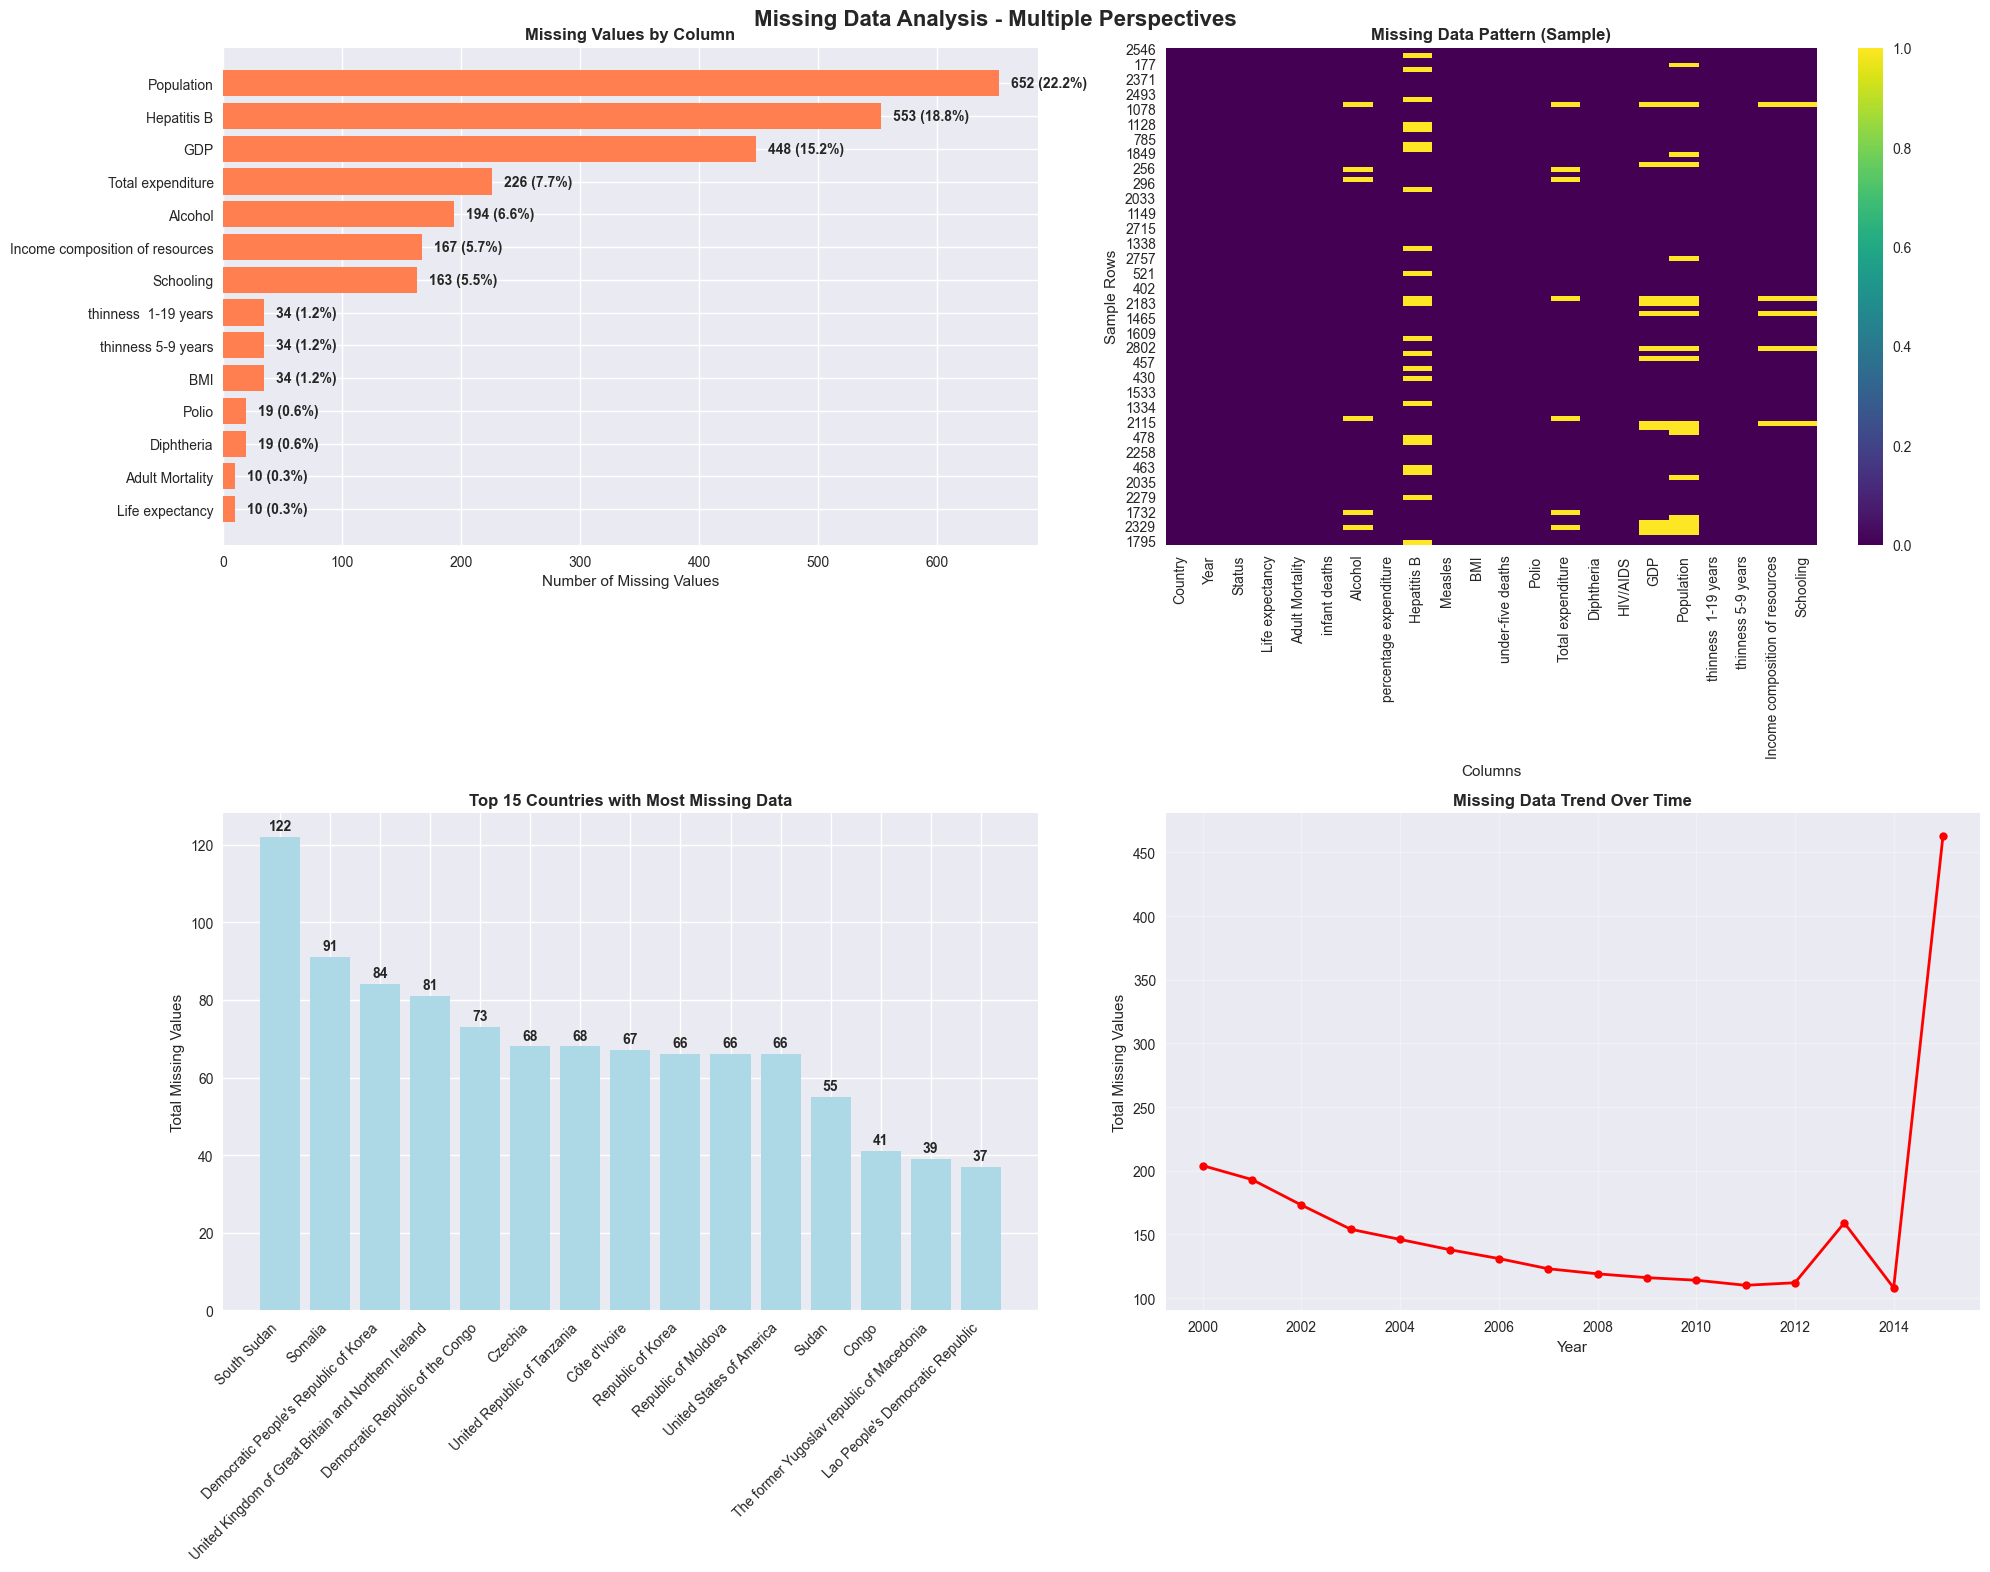

In [7]:
# Calculate missing data statistics
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
}).sort_values('Missing_Percentage', ascending=False)
    
print("Missing Data Summary:")
print(missing_stats[missing_stats['Missing_Count'] > 0].to_string(index=False))
    
# Create comprehensive missing data visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Missing Data Analysis - Multiple Perspectives', fontsize=16, fontweight='bold')
    
# 1. Missing data bar plot
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=True)
    
ax1 = axes[0, 0]
bars = ax1.barh(range(len(missing_data)), missing_data.values, color='coral')
ax1.set_yticks(range(len(missing_data)))
ax1.set_yticklabels(missing_data.index, rotation=0)
ax1.set_xlabel('Number of Missing Values')
ax1.set_title('Missing Values by Column', fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 10, bar.get_y() + bar.get_height()/2, 
            f'{int(width)} ({width/len(df)*100:.1f}%)', 
            ha='left', va='center', fontweight='bold')

# 2. Missing data heatmap
ax2 = axes[0, 1]
# Sample data for heatmap (to avoid overcrowding)
sample_df = df.sample(n=min(100, len(df)), random_state=42)
sns.heatmap(sample_df.isnull(), cbar=True, ax=ax2, cmap='viridis')
ax2.set_title('Missing Data Pattern (Sample)', fontweight='bold')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Sample Rows')

# 3. Missing data by country
ax3 = axes[1, 0]
country_missing = df.groupby('Country').apply(lambda x: x.isnull().sum().sum())
top_missing_countries = country_missing.nlargest(15)
    
bars = ax3.bar(range(len(top_missing_countries)), top_missing_countries.values, color='lightblue')
ax3.set_xticks(range(len(top_missing_countries)))
ax3.set_xticklabels(top_missing_countries.index, rotation=45, ha='right')
ax3.set_ylabel('Total Missing Values')
ax3.set_title('Top 15 Countries with Most Missing Data', fontweight='bold')
    
# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    

# 4. Missing data by year
ax4 = axes[1, 1]
year_missing = df.groupby('Year').apply(lambda x: x.isnull().sum().sum())
    
ax4.plot(year_missing.index, year_missing.values, marker='o', linewidth=2, markersize=6, color='red')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Missing Values')
ax4.set_title('Missing Data Trend Over Time', fontweight='bold')
ax4.grid(True, alpha=0.3)
    
plt.tight_layout()


### 3. TARGET VARIABLE (LIFE EXPECTANCY) ANALYSIS

Life Expectancy Statistics:
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

STATISTICAL INSIGHTS:
Range: 52.70 years
Standard Deviation: 9.52 years
Coefficient of Variation: 13.76%
Skewness: -0.638 (Left-skewed)
Kurtosis: -0.236 (Light-tailed)


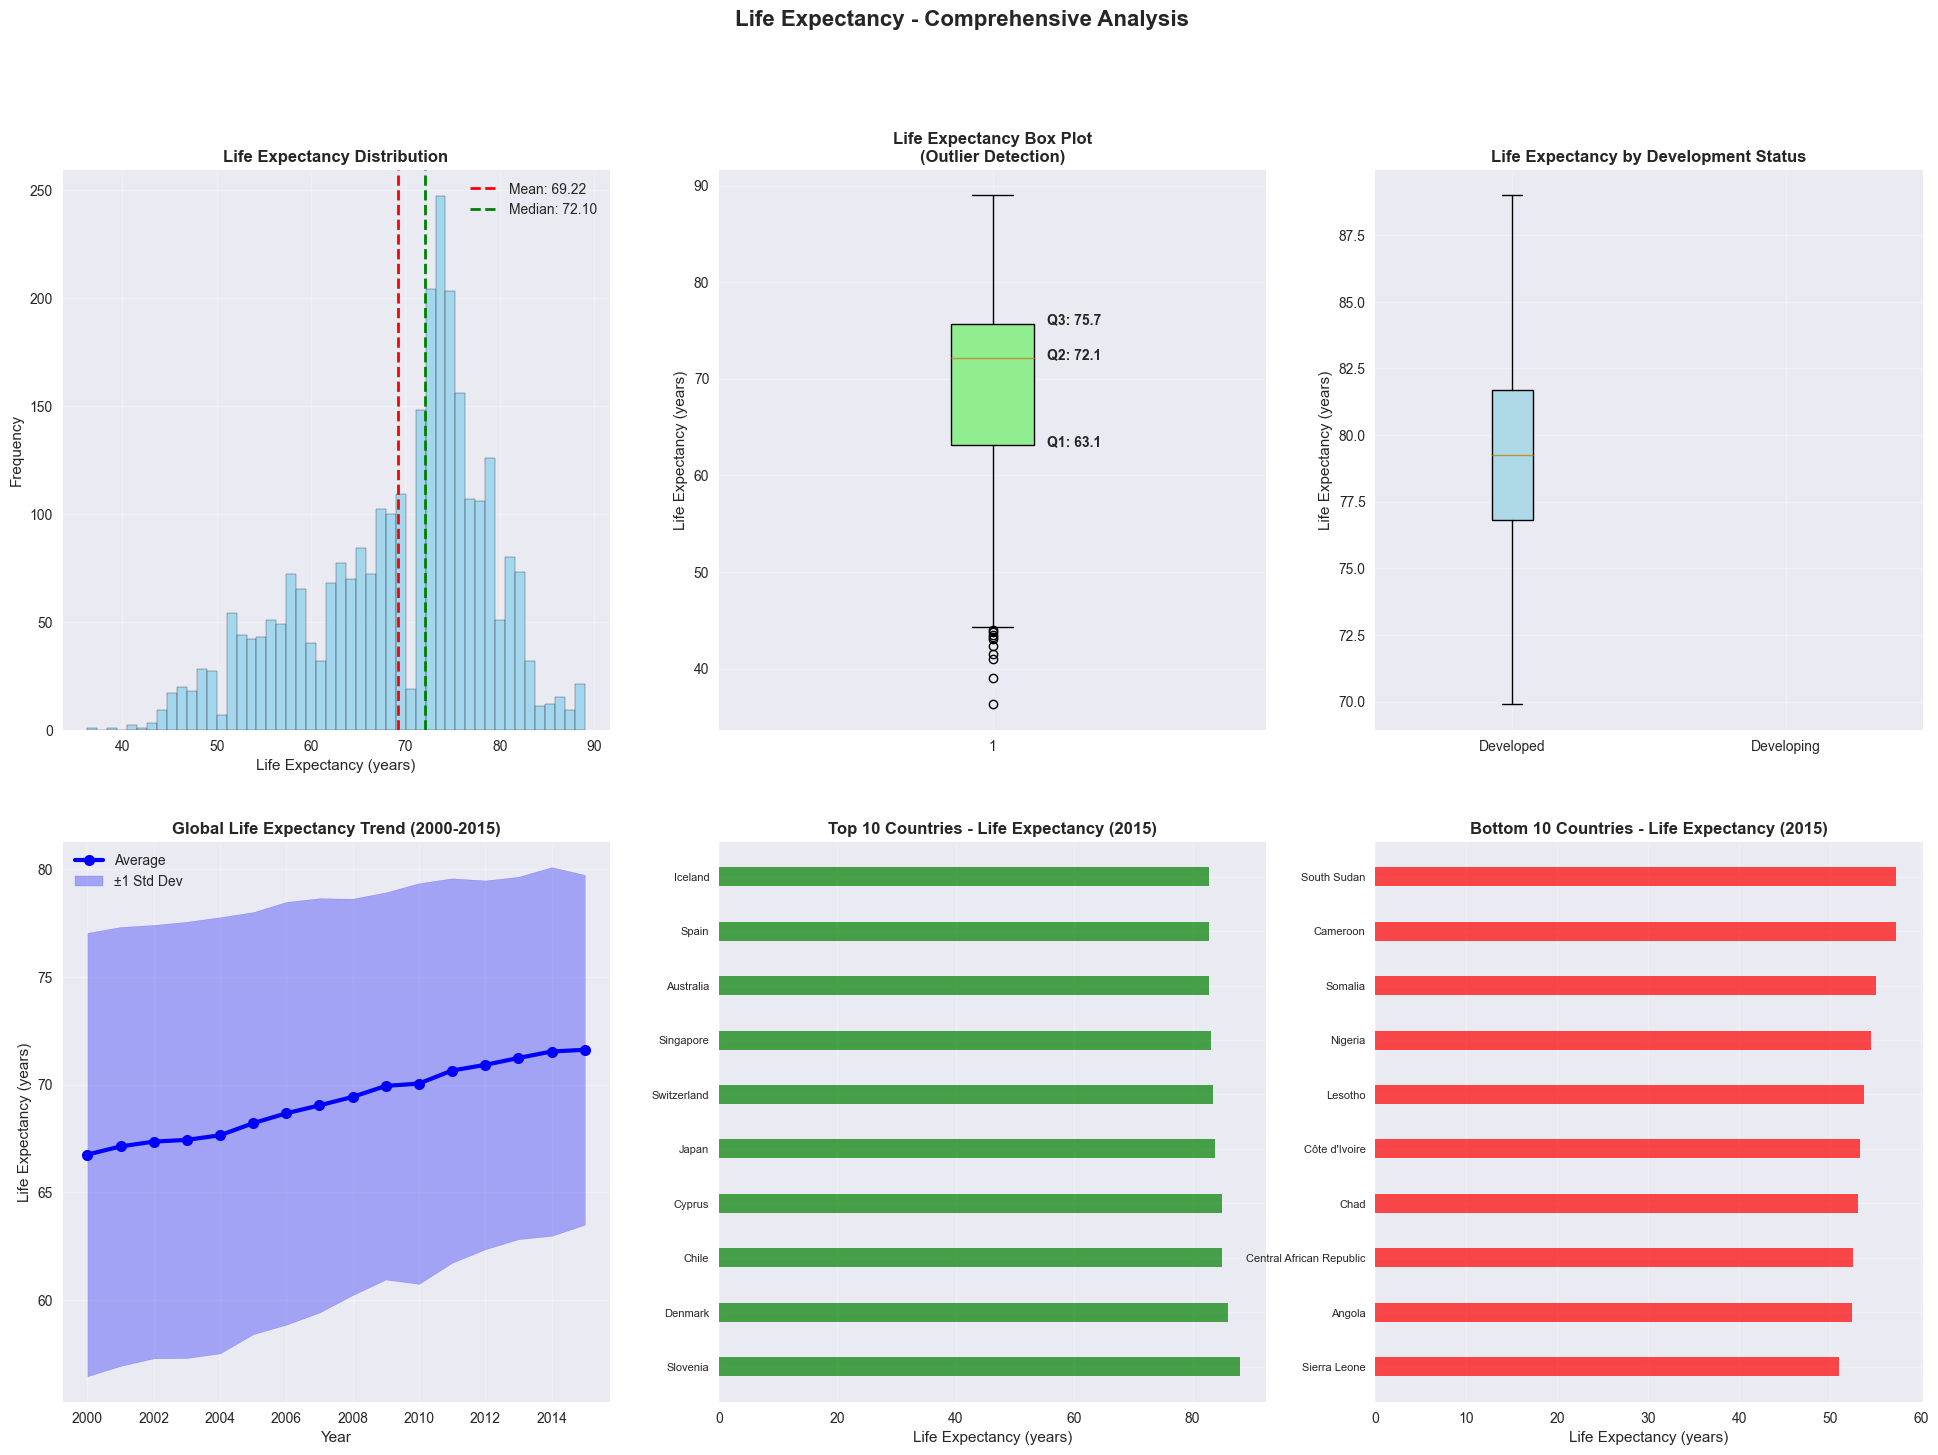

In [8]:
# Basic statistics
target_col = 'Life expectancy'
life_exp_stats = df[target_col].describe()
print("Life Expectancy Statistics:")
print(life_exp_stats)
    
# Create comprehensive target variable visualizations
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Life Expectancy - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
# 1. Distribution histogram with statistical info
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(df[target_col].dropna(), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
ax1.axvline(df[target_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[target_col].mean():.2f}')
ax1.axvline(df[target_col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[target_col].median():.2f}')
ax1.set_xlabel('Life Expectancy (years)')
ax1.set_ylabel('Frequency')
ax1.set_title('Life Expectancy Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
    
# 2. Box plot with outlier analysis
ax2 = axes[0, 1]
box_plot = ax2.boxplot(df[target_col].dropna(), patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgreen')
ax2.set_ylabel('Life Expectancy (years)')
ax2.set_title('Life Expectancy Box Plot\n(Outlier Detection)', fontweight='bold')
ax2.grid(True, alpha=0.3)
    
# Add quartile labels
q1, q2, q3 = df[target_col].quantile([0.25, 0.5, 0.75])
ax2.text(1.1, q1, f'Q1: {q1:.1f}', fontweight='bold')
ax2.text(1.1, q2, f'Q2: {q2:.1f}', fontweight='bold')
ax2.text(1.1, q3, f'Q3: {q3:.1f}', fontweight='bold')
    
# 3. Life expectancy by development status
ax3 = axes[0, 2]
status_groups = df.groupby('Status')[target_col].apply(list)
status_data = [status_groups['Developed'], status_groups['Developing']]
    
bp = ax3.boxplot(status_data, labels=['Developed', 'Developing'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
ax3.set_ylabel('Life Expectancy (years)')
ax3.set_title('Life Expectancy by Development Status', fontweight='bold')
ax3.grid(True, alpha=0.3)
    
# 4. Time trend
ax4 = axes[1, 0]
yearly_avg = df.groupby('Year')[target_col].mean()
yearly_std = df.groupby('Year')[target_col].std()
    
ax4.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=3, markersize=8, color='blue', label='Average')
ax4.fill_between(yearly_avg.index, 
                 yearly_avg.values - yearly_std.values, 
                 yearly_avg.values + yearly_std.values, 
                 alpha=0.3, color='blue', label='±1 Std Dev')
ax4.set_xlabel('Year')
ax4.set_ylabel('Life Expectancy (years)')
ax4.set_title('Global Life Expectancy Trend (2000-2015)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
    
# 5. Top and bottom countries
ax5 = axes[1, 1]
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
    
top_countries = latest_data.nlargest(10, target_col)
bottom_countries = latest_data.nsmallest(10, target_col)
    
# Create side-by-side bars
x_pos = np.arange(10)
width = 0.35
    
bars1 = ax5.barh(x_pos, top_countries[target_col].values, width, color='green', alpha=0.7, label='Top 10')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(top_countries['Country'].values, fontsize=8)
ax5.set_xlabel('Life Expectancy (years)')
ax5.set_title(f'Top 10 Countries - Life Expectancy ({latest_year})', fontweight='bold')
ax5.grid(True, alpha=0.3)
    
# 6. Bottom countries
ax6 = axes[1, 2]
bars2 = ax6.barh(x_pos, bottom_countries[target_col].values, width, color='red', alpha=0.7, label='Bottom 10')
ax6.set_yticks(x_pos)
ax6.set_yticklabels(bottom_countries['Country'].values, fontsize=8)
ax6.set_xlabel('Life Expectancy (years)')
ax6.set_title(f'Bottom 10 Countries - Life Expectancy ({latest_year})', fontweight='bold')
ax6.grid(True, alpha=0.3)

# Statistical tests and insights
print(f"\nSTATISTICAL INSIGHTS:")
print(f"Range: {df[target_col].max() - df[target_col].min():.2f} years")
print(f"Standard Deviation: {df[target_col].std():.2f} years")
print(f"Coefficient of Variation: {(df[target_col].std() / df[target_col].mean()) * 100:.2f}%")
    
# Skewness and kurtosis
from scipy import stats
skewness = stats.skew(df[target_col].dropna())
kurtosis = stats.kurtosis(df[target_col].dropna())
print(f"Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0 else 'Left-skewed' if skewness < 0 else 'Symmetric'})")
print(f"Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")

    

### 4. FEATURE DISTRIBUTIONS ANALYSIS

Analyzing 18 numerical features...


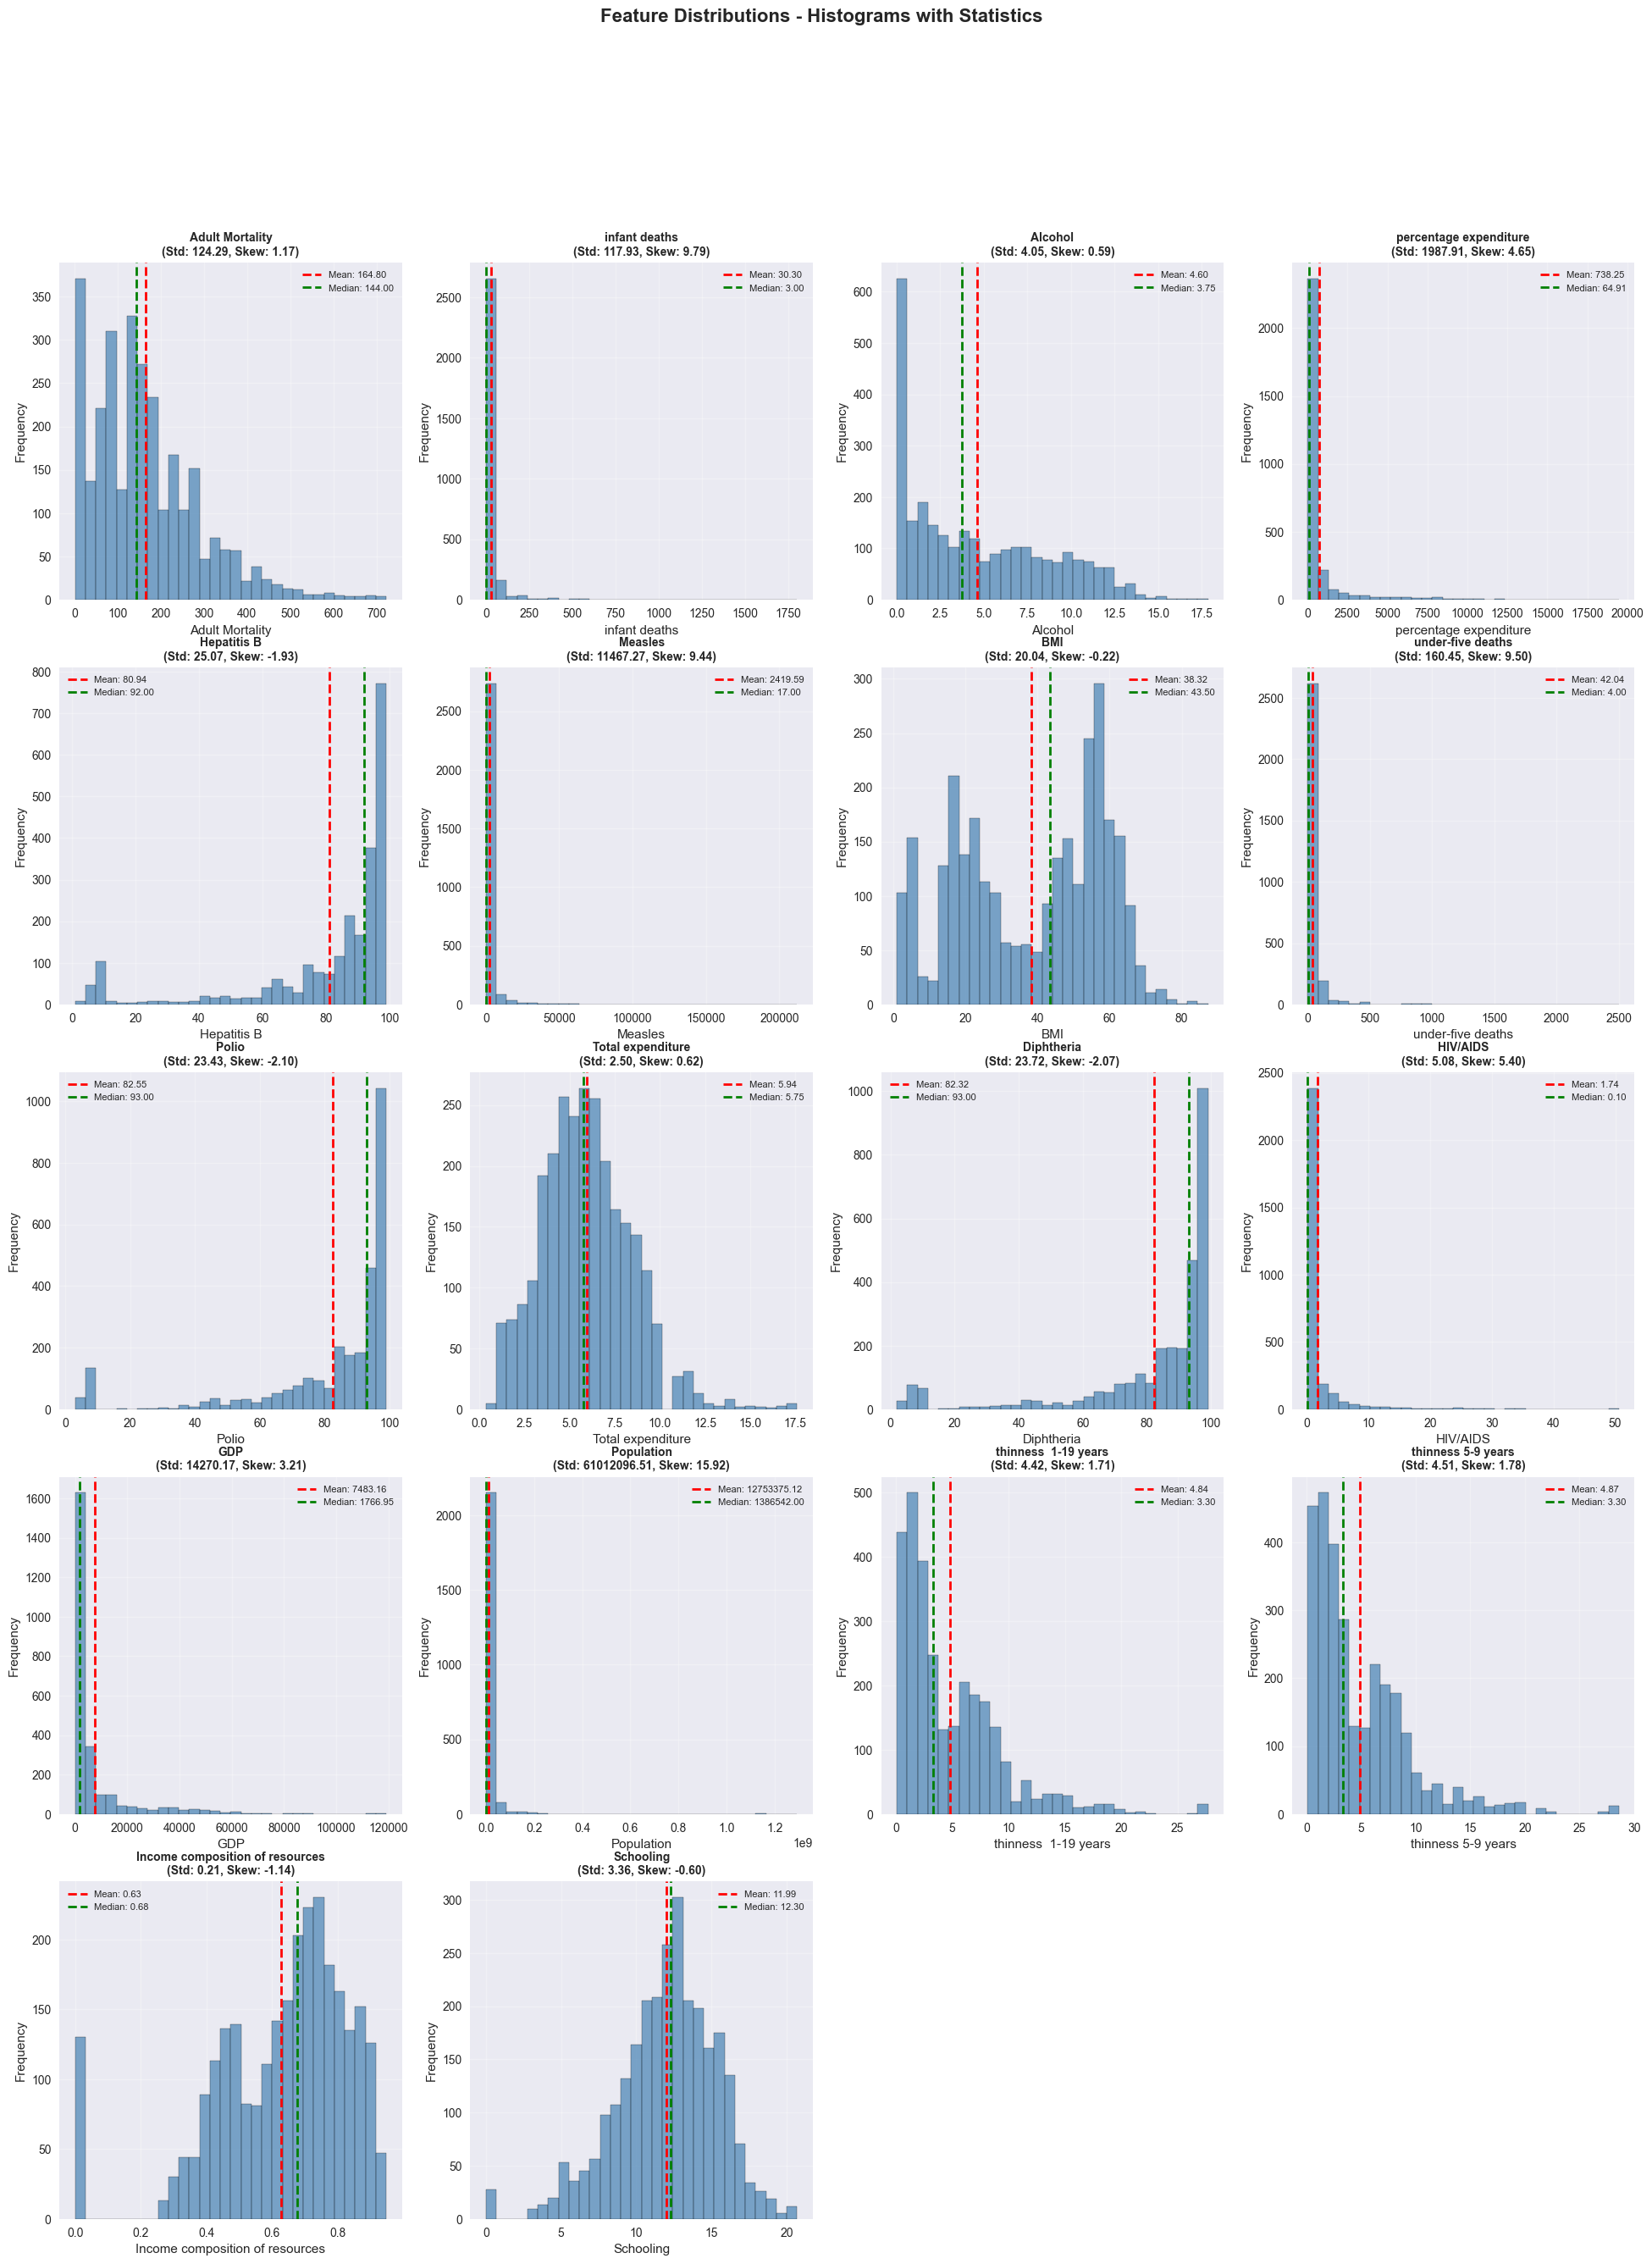

In [9]:
# Get numerical columns (excluding target and identifiers)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['Year', 'Life expectancy']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
    
print(f"Analyzing {len(numerical_cols)} numerical features...")
    
# Create comprehensive distribution plots
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6*n_rows))
fig.suptitle('Feature Distributions - Histograms with Statistics', fontsize=16, fontweight='bold')
    
if n_rows == 1:
    axes = axes.reshape(1, -1)
    
for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
     
    # Histogram with statistics
    data = df[col].dropna()
    ax.hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    ax.set_title(f'{col}\n(Std: {data.std():.2f}, Skew: {data.skew():.2f})', fontweight='bold', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    
# Hide empty subplots
for i in range(len(numerical_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    if n_rows > 1:
        axes[row, col_idx].set_visible(False)
    else:
        axes[col_idx].set_visible(False)

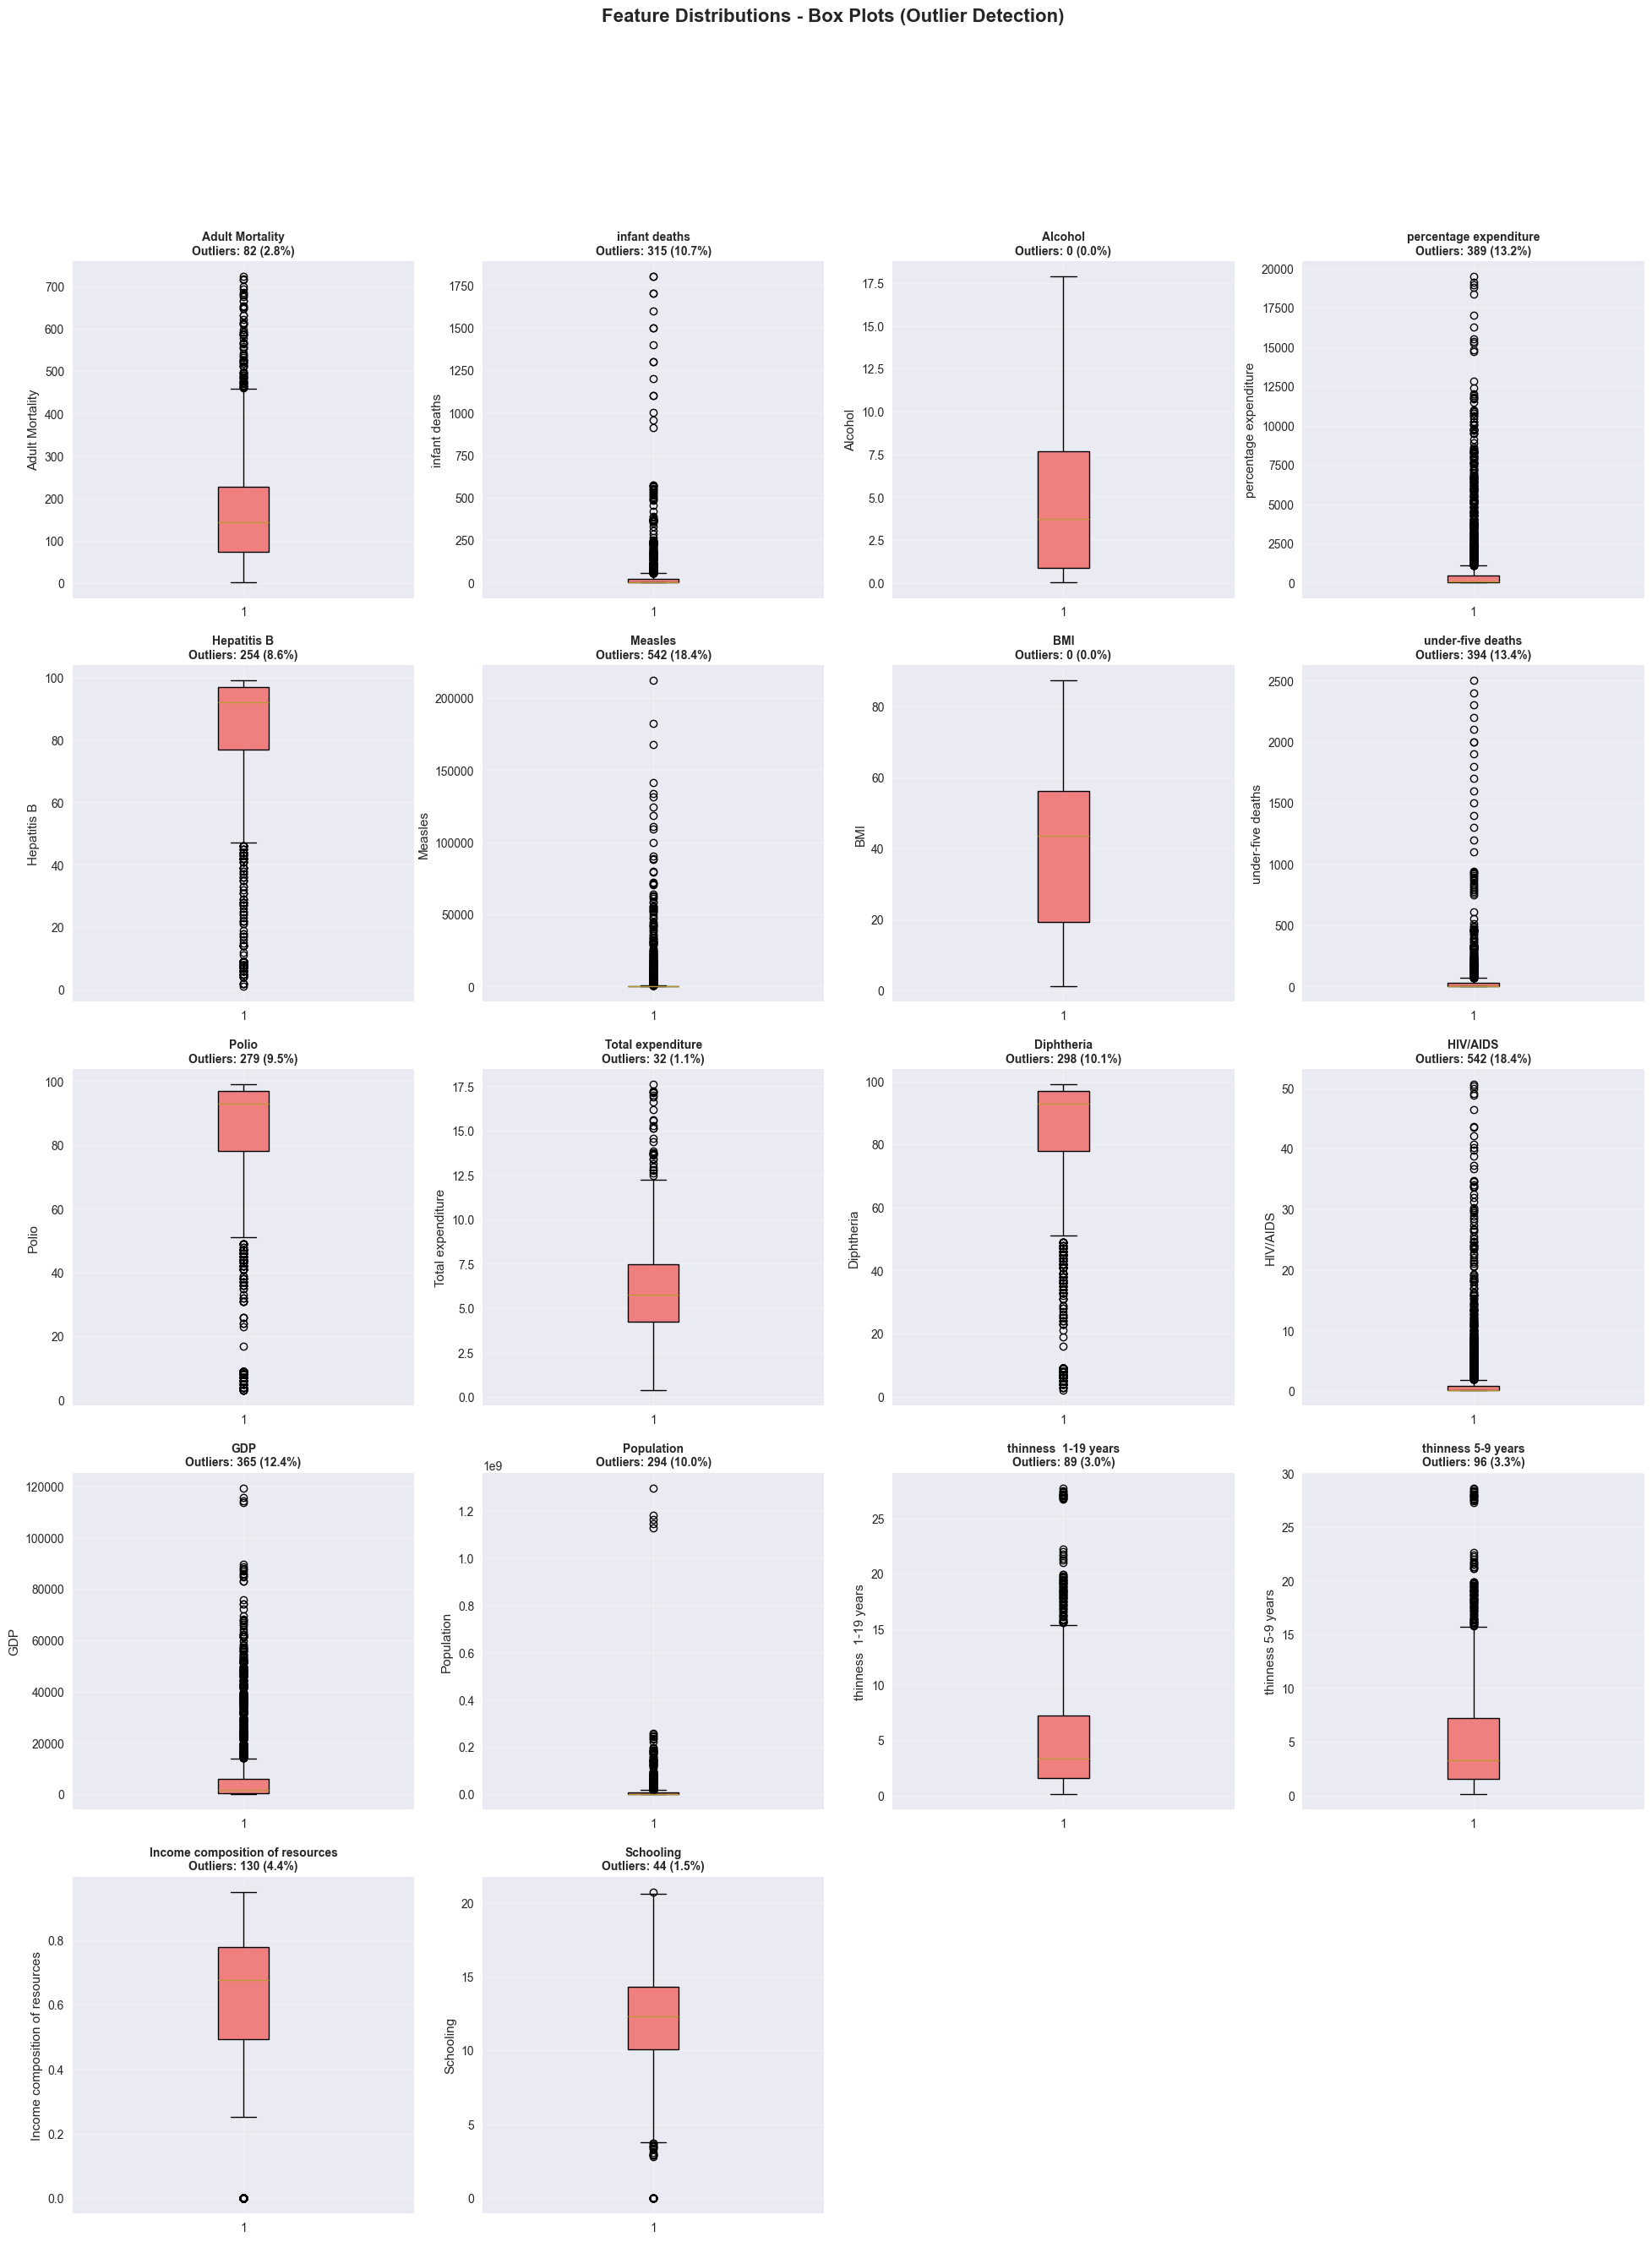

In [ ]:
# `Box plots for outlier detection`
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6*n_rows))
fig.suptitle('Feature Distributions - Box Plots (Outlier Detection)', fontsize=16, fontweight='bold')
    
if n_rows == 1:
    axes = axes.reshape(1, -1)
    
for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
        
    # Box plot
    box_plot = ax.boxplot(df[col].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightcoral')
        
    # Add statistics
    q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)][col]
        
    ax.set_title(f'{col}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)', fontweight='bold', fontsize=10)
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(numerical_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        if n_rows > 1:
            axes[row, col_idx].set_visible(False)
        else:
            axes[col_idx].set_visible(False)

In [11]:
# Summary statistics table
print(f"\nFEATURE STATISTICS SUMMARY")
summary_stats = df[numerical_cols].describe().round(3)
print(summary_stats.to_string())


FEATURE STATISTICS SUMMARY
       Adult Mortality  infant deaths   Alcohol  percentage expenditure  Hepatitis B     Measles       BMI  under-five deaths     Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP    Population  thinness  1-19 years  thinness 5-9 years  Income composition of resources  Schooling
count         2928.000       2938.000  2744.000                2938.000      2385.00    2938.000  2904.000           2938.000  2919.000           2712.000    2919.000  2938.000    2490.000  2.286000e+03               2904.00            2904.000                         2771.000   2775.000
mean           164.796         30.304     4.603                 738.251        80.94    2419.592    38.321             42.036    82.550              5.938      82.324     1.742    7483.158  1.275338e+07                  4.84               4.870                            0.628     11.993
std            124.292        117.927     4.052                1987.915        25.07   11467.272    20.04

### 5. CORRELATION ANALYSIS

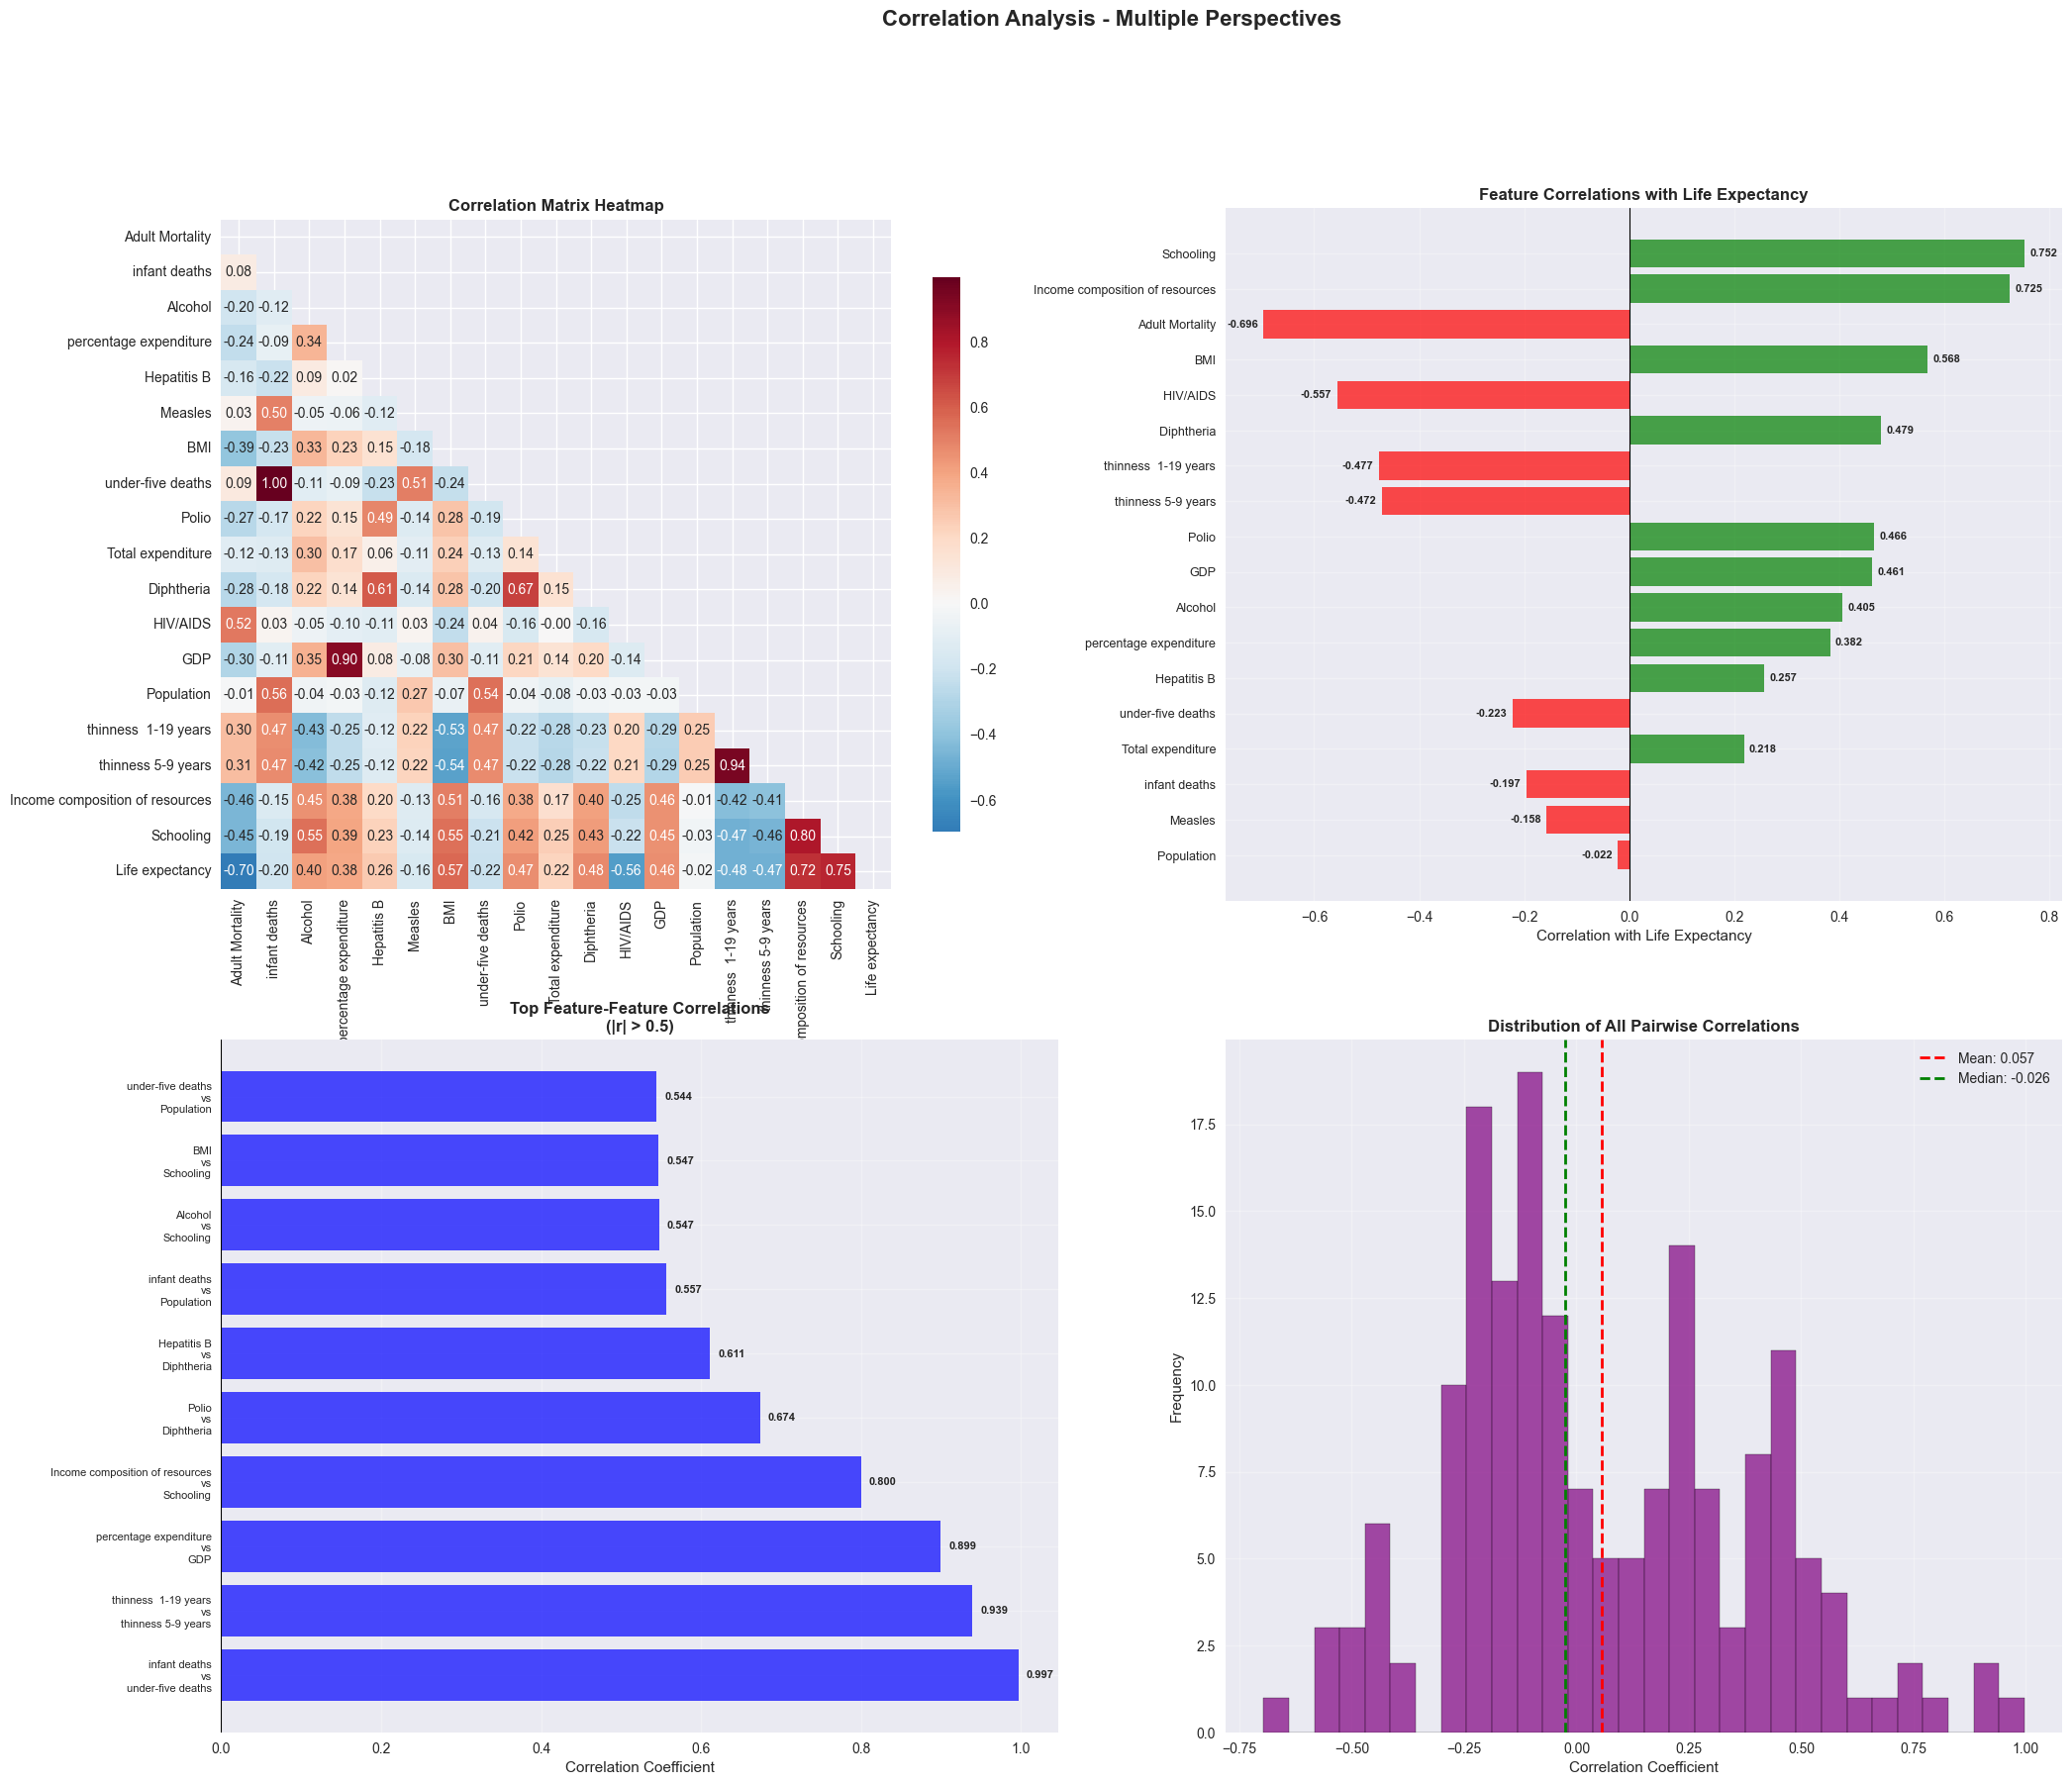

In [12]:
# Calculate correlation matrix
target_col = 'Life expectancy'
all_numerical = numerical_cols + [target_col]
correlation_matrix = df[all_numerical].corr()
    
# Create comprehensive correlation visualizations
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('Correlation Analysis - Multiple Perspectives', fontsize=16, fontweight='bold')
    
# 1. Correlation heatmap
ax1 = axes[0, 0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=ax1, cbar_kws={"shrink": .8})
ax1.set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=12)
    
# 2. Correlation with target variable
ax2 = axes[0, 1]
target_corr = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=True)
    
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index, fontsize=9)
ax2.set_xlabel('Correlation with Life Expectancy')
ax2.set_title('Feature Correlations with Life Expectancy', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axvline(0, color='black', linewidth=0.8)
    
# Add correlation values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center', fontweight='bold', fontsize=8)
    
# 3. Highly correlated pairs (excluding target)
ax3 = axes[1, 0]
corr_without_target = correlation_matrix.drop(target_col).drop(target_col, axis=1)
    
# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_without_target.columns)):
    for j in range(i+1, len(corr_without_target.columns)):
        corr_val = corr_without_target.iloc[i, j]
        if abs(corr_val) > 0.5:  # Threshold for high correlation
            high_corr_pairs.append((corr_without_target.columns[i], corr_without_target.columns[j], corr_val))
    
if high_corr_pairs:
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    
    # Plot top correlations
    top_pairs = pairs_df.head(10)
    colors = ['red' if x < 0 else 'blue' for x in top_pairs['Correlation']]
    bars = ax3.barh(range(len(top_pairs)), top_pairs['Correlation'], color=colors, alpha=0.7)
    ax3.set_yticks(range(len(top_pairs)))
    ax3.set_yticklabels([f"{row['Feature 1']}\nvs\n{row['Feature 2']}" for _, row in top_pairs.iterrows()], fontsize=8)
    ax3.set_xlabel('Correlation Coefficient')
    ax3.set_title('Top Feature-Feature Correlations\n(|r| > 0.5)', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.axvline(0, color='black', linewidth=0.8)
        
    # Add correlation values
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax3.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center', fontweight='bold', fontsize=8)
else:
    ax3.text(0.5, 0.5, 'No highly correlated\nfeature pairs found\n(|r| > 0.5)', 
            ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Feature-Feature Correlations', fontweight='bold', fontsize=12)
    
# 4. Correlation distribution
ax4 = axes[1, 1]
# Get all correlation values (upper triangle, excluding diagonal)
corr_values = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_values.append(correlation_matrix.iloc[i, j])
    
ax4.hist(corr_values, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax4.axvline(np.mean(corr_values), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(corr_values):.3f}')
ax4.axvline(np.median(corr_values), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(corr_values):.3f}')
ax4.set_xlabel('Correlation Coefficient')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of All Pairwise Correlations', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

In [13]:
print(f"\nCORRELATION INSIGHTS:")
print(f"Strongest positive correlation with Life Expectancy: {target_corr.idxmax()} ({target_corr.max():.3f})")
print(f"Strongest negative correlation with Life Expectancy: {target_corr.idxmin()} ({target_corr.min():.3f})")
print(f"Average absolute correlation with Life Expectancy: {abs(target_corr).mean():.3f}")
    
if high_corr_pairs:
    print(f"Number of highly correlated feature pairs (|r| > 0.5): {len(high_corr_pairs)}")
    print("Top 3 feature-feature correlations:")
    for i, (f1, f2, corr) in enumerate(high_corr_pairs[:3]):
        print(f"  {i+1}. {f1} vs {f2}: {corr:.3f}")


CORRELATION INSIGHTS:
Strongest positive correlation with Life Expectancy: Schooling (0.752)
Strongest negative correlation with Life Expectancy: Adult Mortality (-0.696)
Average absolute correlation with Life Expectancy: 0.417
Number of highly correlated feature pairs (|r| > 0.5): 16
Top 3 feature-feature correlations:
  1. infant deaths vs under-five deaths: 0.997
  2. thinness  1-19 years vs thinness 5-9 years: 0.939
  3. percentage expenditure vs GDP: 0.899


### 6. TEMPORAL ANALYSIS

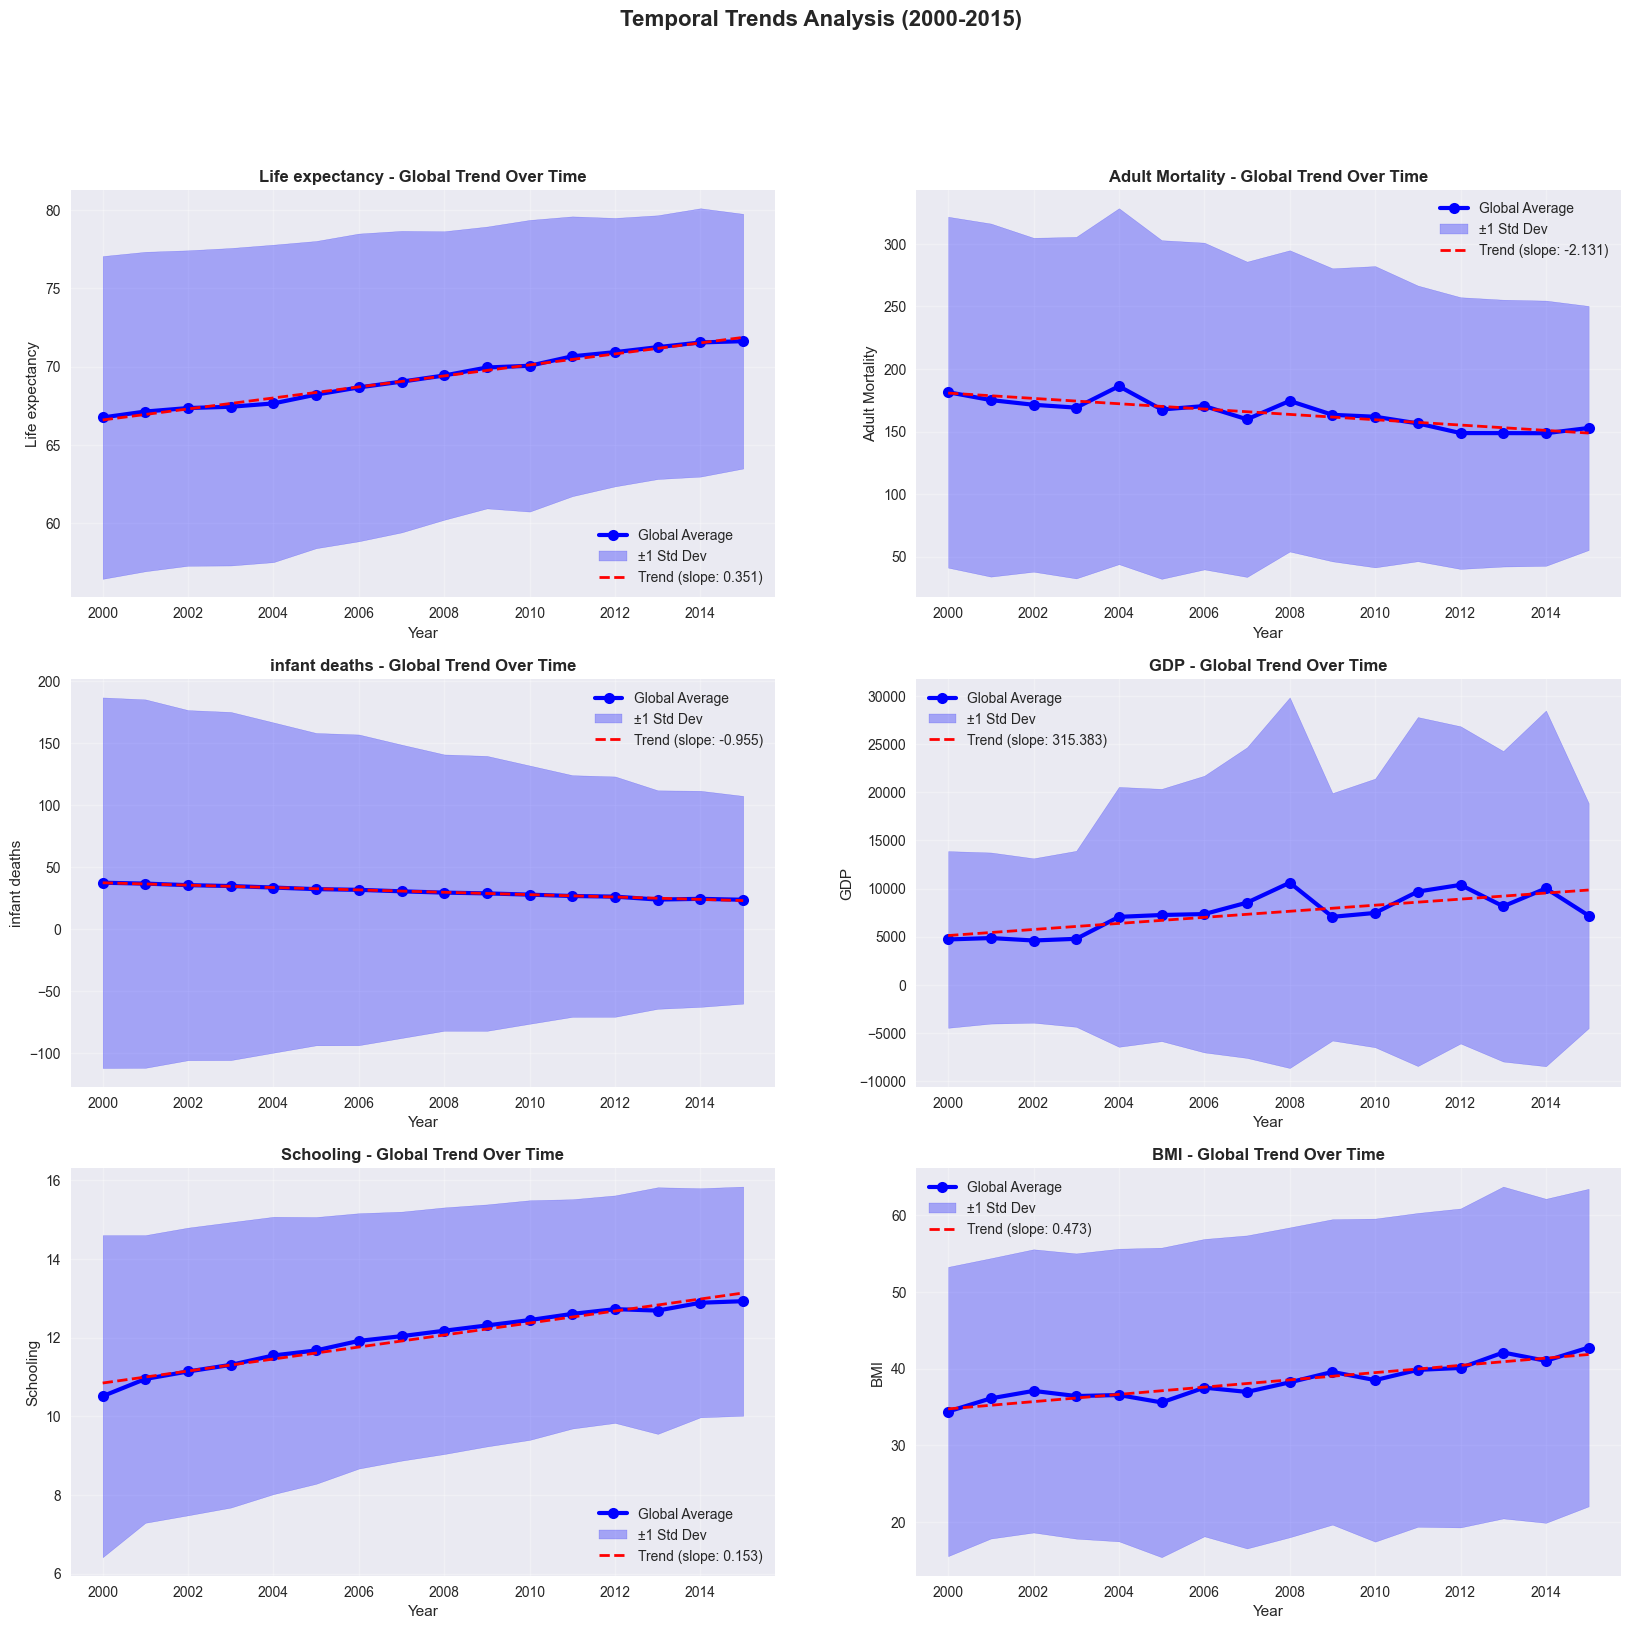

In [14]:
# Key metrics to analyze over time
key_metrics = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'GDP', 'Schooling', 'BMI']
    
# Create comprehensive temporal visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Temporal Trends Analysis (2000-2015)', fontsize=16, fontweight='bold')
    
for i, metric in enumerate(key_metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
        
    # Calculate yearly statistics
    yearly_stats = df.groupby('Year')[metric].agg(['mean', 'median', 'std']).reset_index()
    
    # Plot trends
    ax.plot(yearly_stats['Year'], yearly_stats['mean'], marker='o', linewidth=3, markersize=8, 
            color='blue', label='Global Average')
    ax.fill_between(yearly_stats['Year'], 
                   yearly_stats['mean'] - yearly_stats['std'], 
                   yearly_stats['mean'] + yearly_stats['std'], 
                   alpha=0.3, color='blue', label='±1 Std Dev')
        
    # Add trend line
    z = np.polyfit(yearly_stats['Year'], yearly_stats['mean'], 1)
    p = np.poly1d(z)
    ax.plot(yearly_stats['Year'], p(yearly_stats['Year']), 
            linestyle='--', color='red', linewidth=2, label=f'Trend (slope: {z[0]:.3f})')
    
    ax.set_xlabel('Year')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} - Global Trend Over Time', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

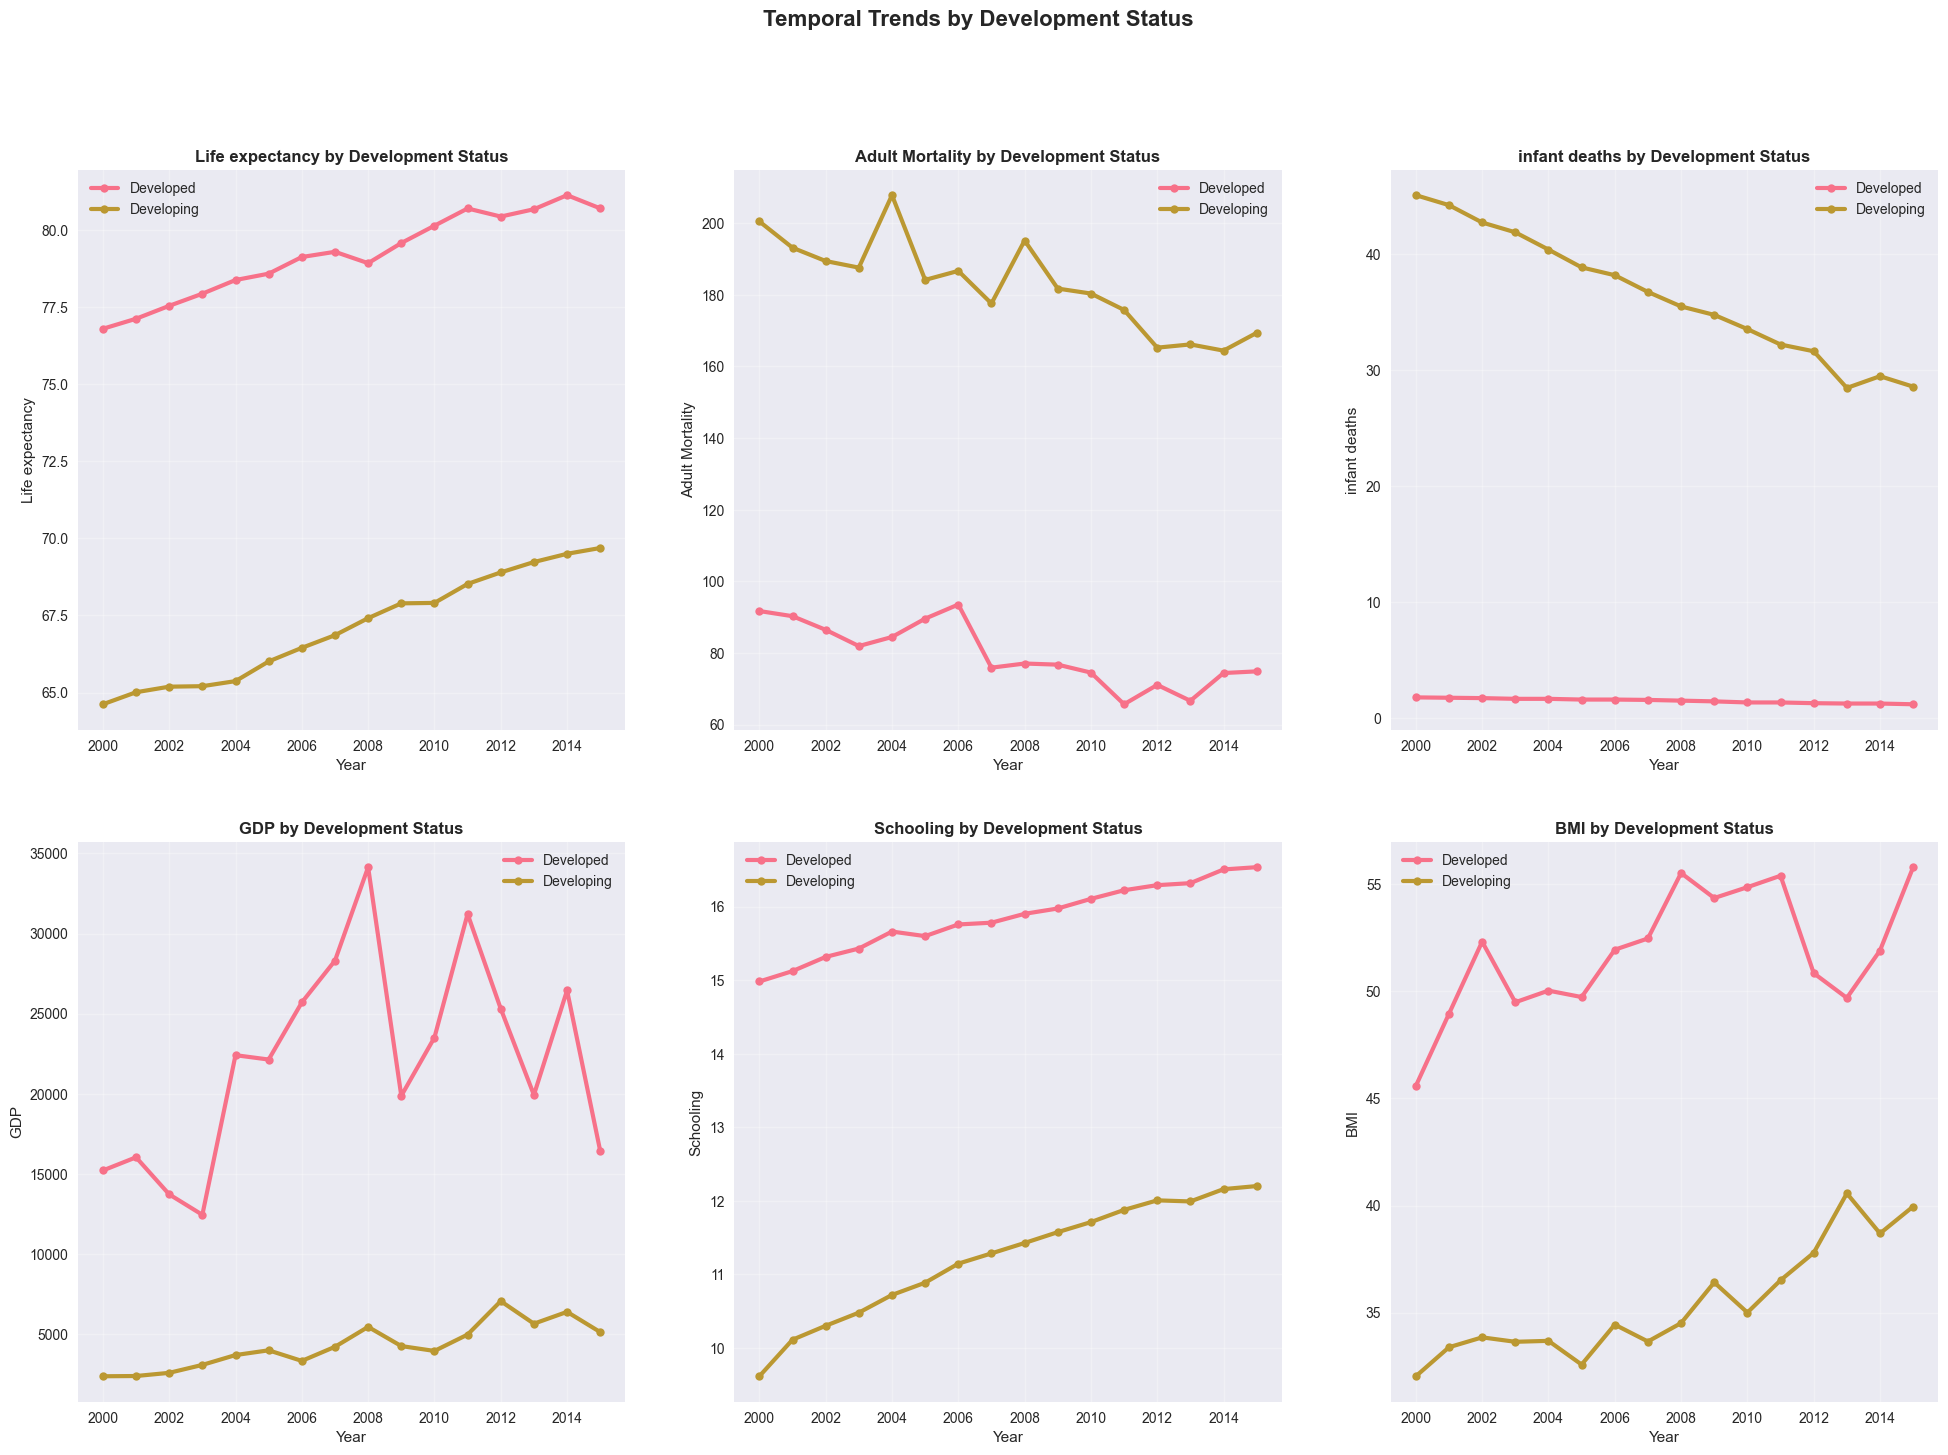

In [15]:
# Development status comparison over time
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Temporal Trends by Development Status', fontsize=16, fontweight='bold')
    
for i, metric in enumerate(key_metrics):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
        
    # Calculate yearly statistics by development status
    for status in ['Developed', 'Developing']:
        status_data = df[df['Status'] == status].groupby('Year')[metric].mean()
        ax.plot(status_data.index, status_data.values, marker='o', linewidth=3, 
               markersize=6, label=status)
        
    ax.set_xlabel('Year')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Development Status', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

In [16]:
yoy_changes = {}
for metric in key_metrics:
    yearly_avg = df.groupby('Year')[metric].mean()
    yoy_change = yearly_avg.pct_change().mean() * 100
    yoy_changes[metric] = yoy_change
    print(f"{metric}: {yoy_change:+.2f}% average annual change")

Life expectancy: +0.47% average annual change
Adult Mortality: -1.00% average annual change
infant deaths: -2.97% average annual change
GDP: +5.09% average annual change
Schooling: +1.39% average annual change
BMI: +1.50% average annual change


### 7. GEOGRAPHIC ANALYSIS

Analyzing 183 countries for year 2015


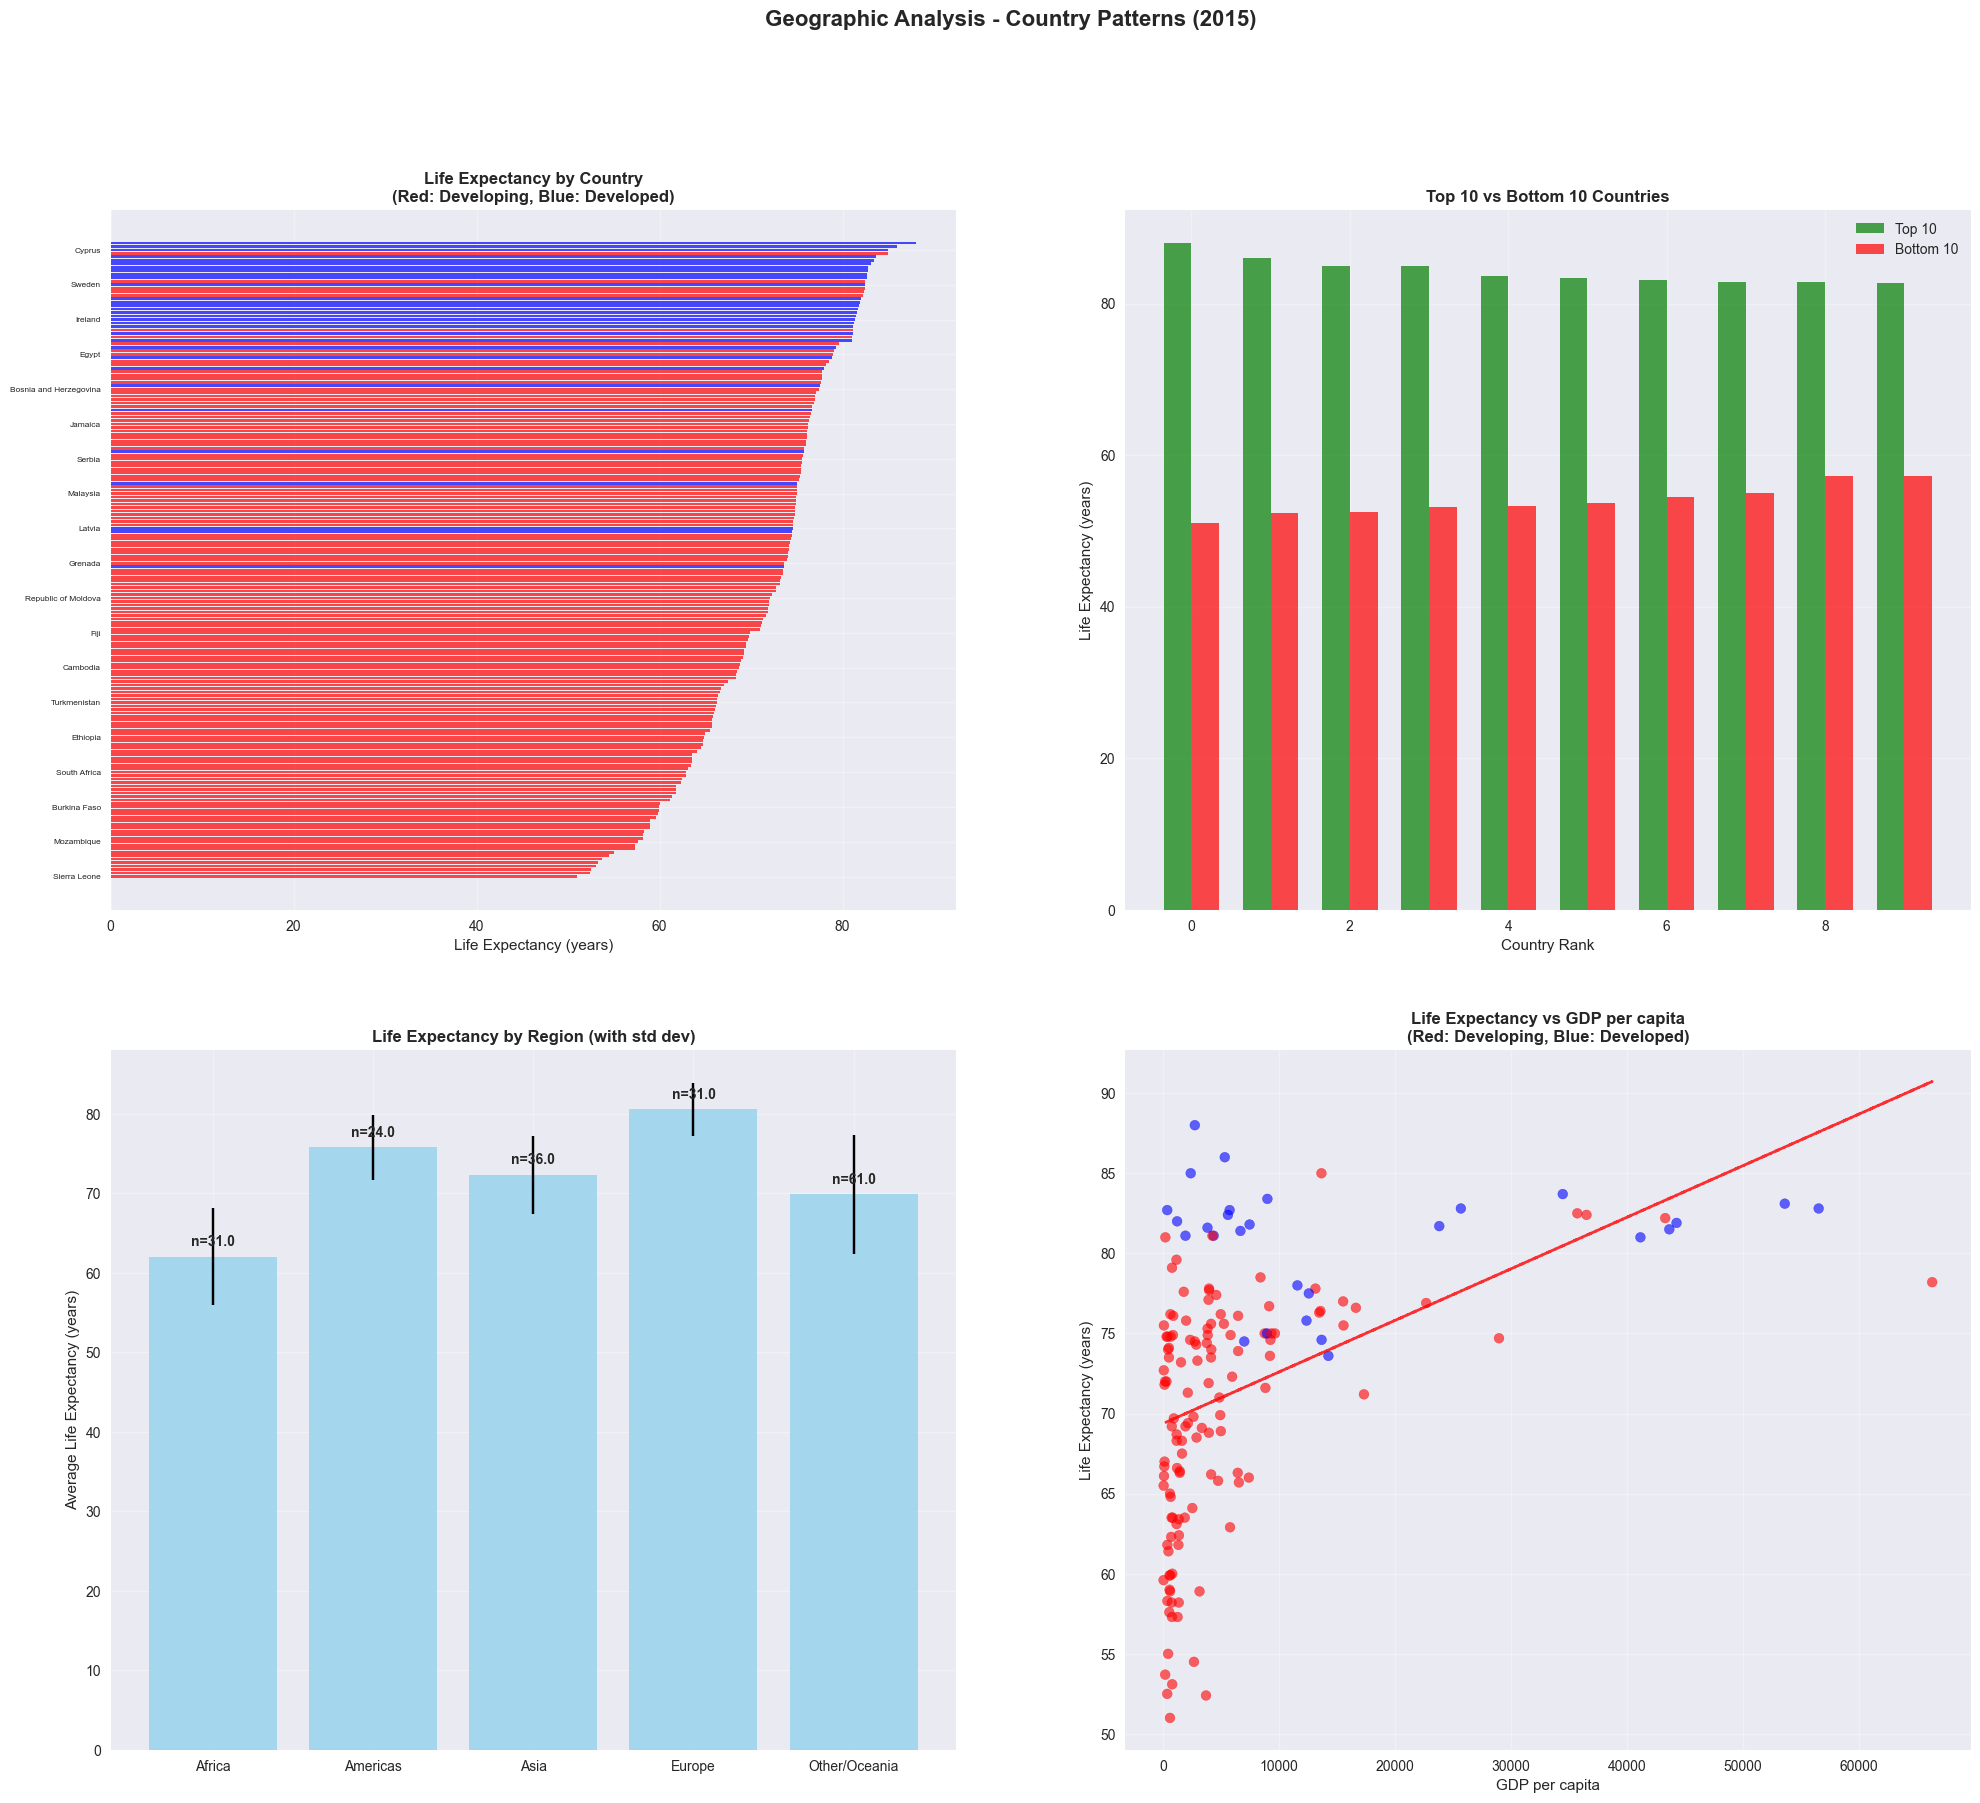

In [17]:
# Latest year data for country analysis
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year].copy()
    
print(f"Analyzing {len(latest_data)} countries for year {latest_year}")
    
# Create comprehensive geographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle(f'Geographic Analysis - Country Patterns ({latest_year})', fontsize=16, fontweight='bold')
    
# 1. Life expectancy distribution by countries
ax1 = axes[0, 0]
country_life_exp = latest_data.set_index('Country')['Life expectancy'].sort_values(ascending=True)
    
# Color code by development status
colors = ['red' if latest_data[latest_data['Country'] == country]['Status'].iloc[0] == 'Developing' 
         else 'blue' for country in country_life_exp.index]
    
bars = ax1.barh(range(len(country_life_exp)), country_life_exp.values, color=colors, alpha=0.7)
ax1.set_yticks(range(0, len(country_life_exp), 10))  # Show every 10th country
ax1.set_yticklabels(country_life_exp.index[::10], fontsize=6)
ax1.set_xlabel('Life Expectancy (years)')
ax1.set_title('Life Expectancy by Country\n(Red: Developing, Blue: Developed)', fontweight='bold')
ax1.grid(True, alpha=0.3)
    
# 2. Top and bottom performing countries
ax2 = axes[0, 1]
top_10 = latest_data.nlargest(10, 'Life expectancy')
bottom_10 = latest_data.nsmallest(10, 'Life expectancy')
    
x_pos = np.arange(10)
width = 0.35
    
bars1 = ax2.bar(x_pos - width/2, top_10['Life expectancy'], width, label='Top 10', color='green', alpha=0.7)
bars2 = ax2.bar(x_pos + width/2, bottom_10['Life expectancy'], width, label='Bottom 10', color='red', alpha=0.7)
    
ax2.set_xlabel('Country Rank')
ax2.set_ylabel('Life Expectancy (years)')
ax2.set_title('Top 10 vs Bottom 10 Countries', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
    
# 3. Regional analysis (if we can infer regions from country names)
ax3 = axes[1, 0]
    
# Create regional groupings based on common patterns
def assign_region(country):
    africa_keywords = ['Algeria', 'Angola', 'Botswana', 'Burkina', 'Burundi', 'Cameroon', 'Chad', 'Congo', 
                      'Ethiopia', 'Ghana', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Morocco', 'Niger', 
                      'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 
                       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
    europe_keywords = ['Albania', 'Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 
                      'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 
                      'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 
                      'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
                      'United Kingdom']
    asia_keywords = ['Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'China', 'India', 'Indonesia', 
                    'Iran', 'Iraq', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 
                    'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 
                    'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 
                    'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen']
    americas_keywords = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 
                           'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 
                           'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 
                           'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
        
    if any(keyword in country for keyword in africa_keywords):
        return 'Africa'
    elif any(keyword in country for keyword in europe_keywords):
        return 'Europe'
    elif any(keyword in country for keyword in asia_keywords):
        return 'Asia'
    elif any(keyword in country for keyword in americas_keywords):
        return 'Americas'
    else:
        return 'Other/Oceania'
    
latest_data['Region'] = latest_data['Country'].apply(assign_region)
regional_stats = latest_data.groupby('Region')['Life expectancy'].agg(['mean', 'std', 'count'])
    
bars = ax3.bar(regional_stats.index, regional_stats['mean'], 
               yerr=regional_stats['std'], capsize=5, color='skyblue', alpha=0.7)
ax3.set_ylabel('Average Life Expectancy (years)')
ax3.set_title('Life Expectancy by Region (with std dev)', fontweight='bold')
ax3.grid(True, alpha=0.3)
    
# Add count labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'n={regional_stats.iloc[i]["count"]}', ha='center', va='bottom', fontweight='bold')
    
# 4. Country performance vs GDP
ax4 = axes[1, 1]
# Filter out countries with missing GDP data
gdp_data = latest_data.dropna(subset=['GDP', 'Life expectancy'])

scatter = ax4.scatter(gdp_data['GDP'], gdp_data['Life expectancy'], 
                     c=['red' if status == 'Developing' else 'blue' for status in gdp_data['Status']], 
                     alpha=0.6, s=50)
    
# Add trend line
if len(gdp_data) > 1:
    z = np.polyfit(gdp_data['GDP'], gdp_data['Life expectancy'], 1)
    p = np.poly1d(z)
    ax4.plot(gdp_data['GDP'], p(gdp_data['GDP']), "r--", alpha=0.8, linewidth=2)
    
ax4.set_xlabel('GDP per capita')
ax4.set_ylabel('Life Expectancy (years)')
ax4.set_title('Life Expectancy vs GDP per capita\n(Red: Developing, Blue: Developed)', fontweight='bold')
ax4.grid(True, alpha=0.3)

In [18]:
# Print regional insights
print(f"\nREGIONAL INSIGHTS ({latest_year}):")
print(regional_stats.round(2).to_string())


REGIONAL INSIGHTS (2015):
                mean   std  count
Region                           
Africa         62.02  6.10     31
Americas       75.80  4.06     24
Asia           72.32  4.85     36
Europe         80.57  3.32     31
Other/Oceania  69.89  7.53     61


### Comprehensive comparison between Developed and Developing countries

Statistical Comparison (Top 10 most significant differences):
                        Feature  Developed_Mean  Developing_Mean  Difference  P_Value  Significant
                        Alcohol          9.8267           3.4841      6.3426      0.0         True
                      Schooling         15.8455          11.2193      4.6262      0.0         True
                Life expectancy         79.1979          67.1115     12.0864      0.0         True
Income composition of resources          0.8525           0.5823      0.2702      0.0         True
         percentage expenditure       2703.6004         323.4703   2380.1301      0.0         True
                            GDP      22053.3864        4286.5561  17766.8304      0.0         True
           thinness  1-19 years          1.3207           5.5929     -4.2722      0.0         True
             thinness 5-9 years          1.2967           5.6352     -4.3386      0.0         True
                Adult Mortality         79.6855

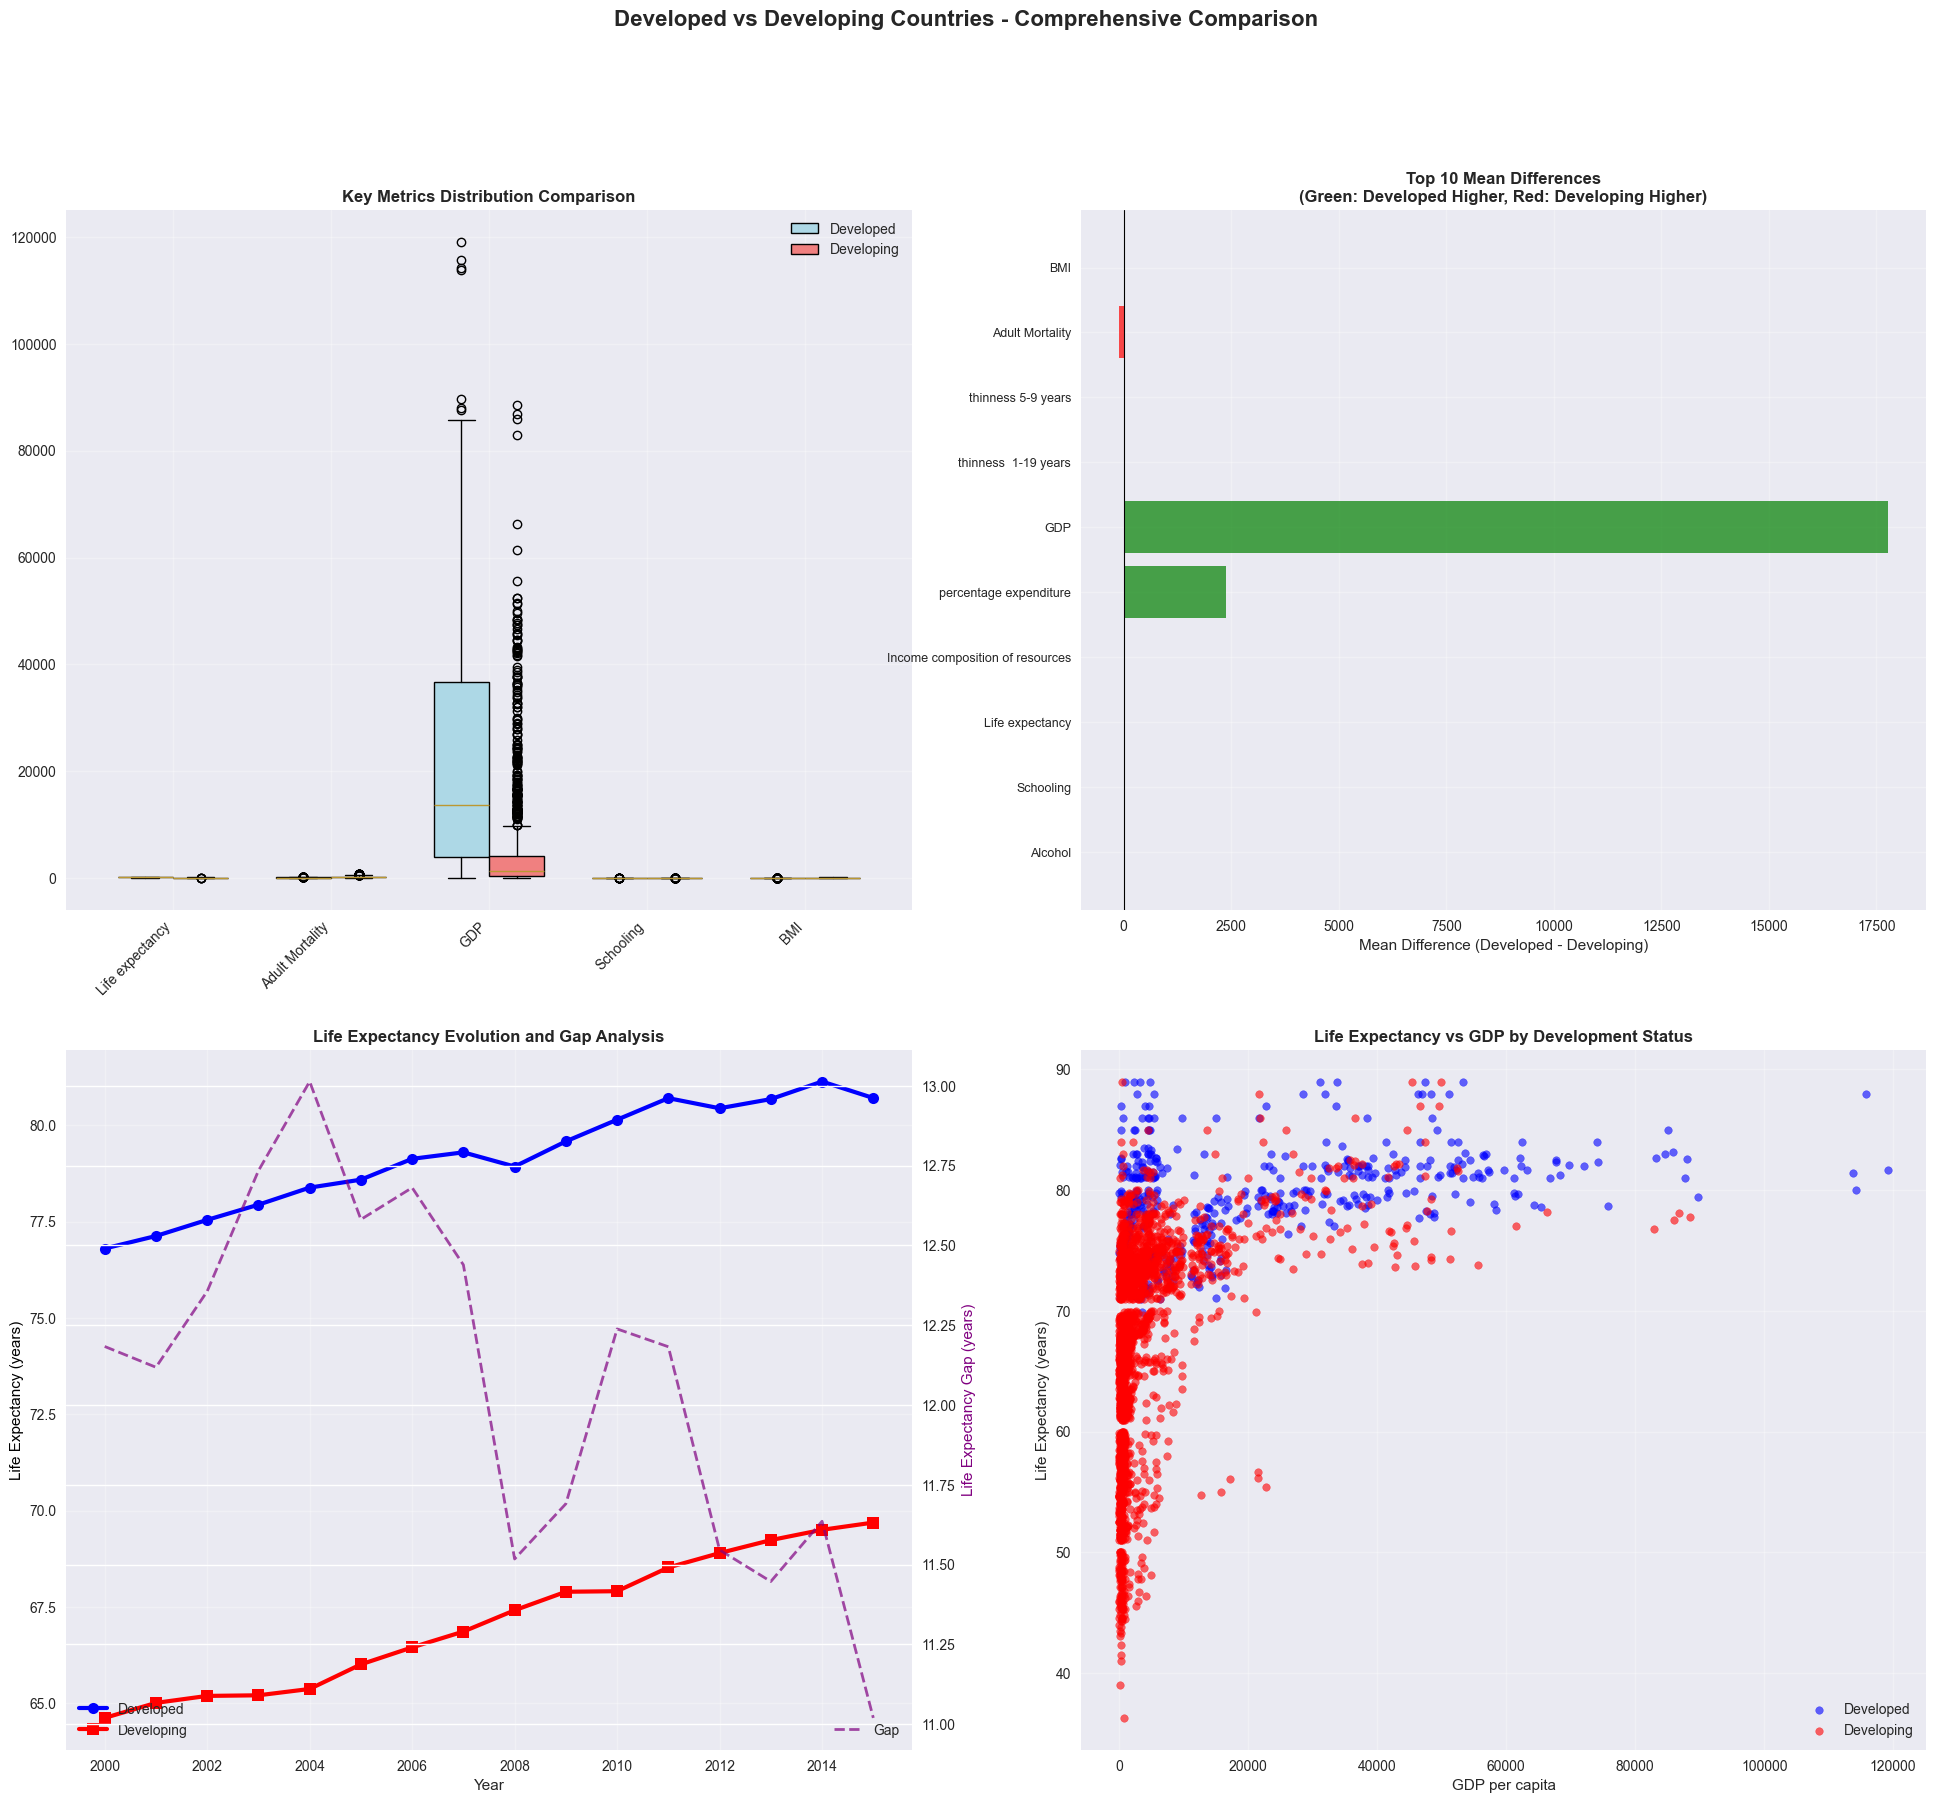

In [19]:
# Statistical comparison
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['Year']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Create comparison statistics
comparison_stats = []
for col in numerical_cols:
    developed = df[df['Status'] == 'Developed'][col].dropna()
    developing = df[df['Status'] == 'Developing'][col].dropna()
    
    if len(developed) > 0 and len(developing) > 0:
        # Statistical test
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(developed, developing)
        
        comparison_stats.append({
            'Feature': col,
            'Developed_Mean': developed.mean(),
            'Developing_Mean': developing.mean(),
            'Difference': developed.mean() - developing.mean(),
            'Developed_Std': developed.std(),
            'Developing_Std': developing.std(),
            'T_Statistic': t_stat,
            'P_Value': p_value,
            'Significant': p_value < 0.05
        })
    
comparison_df = pd.DataFrame(comparison_stats)
comparison_df = comparison_df.sort_values('P_Value')
    
print("Statistical Comparison (Top 10 most significant differences):")
print(comparison_df.head(10)[['Feature', 'Developed_Mean', 'Developing_Mean', 'Difference', 'P_Value', 'Significant']].round(4).to_string(index=False))
    
# Create comprehensive comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('Developed vs Developing Countries - Comprehensive Comparison', fontsize=16, fontweight='bold')
    
# 1. Box plots for key metrics
ax1 = axes[0, 0]
key_metrics = ['Life expectancy', 'Adult Mortality', 'GDP', 'Schooling', 'BMI']
    
developed_data = [df[df['Status'] == 'Developed'][metric].dropna() for metric in key_metrics]
developing_data = [df[df['Status'] == 'Developing'][metric].dropna() for metric in key_metrics]
    
positions = np.arange(len(key_metrics))
width = 0.35
    
bp1 = ax1.boxplot(developed_data, positions=positions - width/2, widths=width, patch_artist=True)
bp2 = ax1.boxplot(developing_data, positions=positions + width/2, widths=width, patch_artist=True)
    
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
    
ax1.set_xticks(positions)
ax1.set_xticklabels(key_metrics, rotation=45, ha='right')
ax1.set_title('Key Metrics Distribution Comparison', fontweight='bold')
ax1.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Developed', 'Developing'], loc='upper right')
ax1.grid(True, alpha=0.3)
    
# 2. Mean differences bar chart
ax2 = axes[0, 1]
top_differences = comparison_df.head(10)
    
colors = ['green' if x > 0 else 'red' for x in top_differences['Difference']]
bars = ax2.barh(range(len(top_differences)), top_differences['Difference'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(top_differences)))
ax2.set_yticklabels(top_differences['Feature'], fontsize=9)
ax2.set_xlabel('Mean Difference (Developed - Developing)')
ax2.set_title('Top 10 Mean Differences\n(Green: Developed Higher, Red: Developing Higher)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(0, color='black', linewidth=0.8)
    
# 3. Life expectancy evolution by status
ax3 = axes[1, 0]
yearly_comparison = df.groupby(['Year', 'Status'])['Life expectancy'].mean().unstack()
    
ax3.plot(yearly_comparison.index, yearly_comparison['Developed'], marker='o', linewidth=3, 
        markersize=8, color='blue', label='Developed')
ax3.plot(yearly_comparison.index, yearly_comparison['Developing'], marker='s', linewidth=3, 
        markersize=8, color='red', label='Developing')
    
# Add gap analysis
gap = yearly_comparison['Developed'] - yearly_comparison['Developing']
ax3_twin = ax3.twinx()
ax3_twin.plot(yearly_comparison.index, gap, '--', color='purple', linewidth=2, alpha=0.7, label='Gap')
    
ax3.set_xlabel('Year')
ax3.set_ylabel('Life Expectancy (years)', color='black')
ax3_twin.set_ylabel('Life Expectancy Gap (years)', color='purple')
ax3.set_title('Life Expectancy Evolution and Gap Analysis', fontweight='bold')
ax3.legend(loc='lower left')
ax3_twin.legend(loc='lower right')
ax3.grid(True, alpha=0.3)
    
# 4. Scatter plot comparison
ax4 = axes[1, 1]
developed_countries = df[df['Status'] == 'Developed']
developing_countries = df[df['Status'] == 'Developing']
    
ax4.scatter(developed_countries['GDP'], developed_countries['Life expectancy'], 
           alpha=0.6, color='blue', s=30, label='Developed')
ax4.scatter(developing_countries['GDP'], developing_countries['Life expectancy'], 
           alpha=0.6, color='red', s=30, label='Developing')
    
ax4.set_xlabel('GDP per capita')
ax4.set_ylabel('Life Expectancy (years)')
ax4.set_title('Life Expectancy vs GDP by Development Status', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

### 9. ADVANCED INSIGHTS AND CLUSTERING

Optimal number of clusters: 2 (Silhouette Score: 0.391)


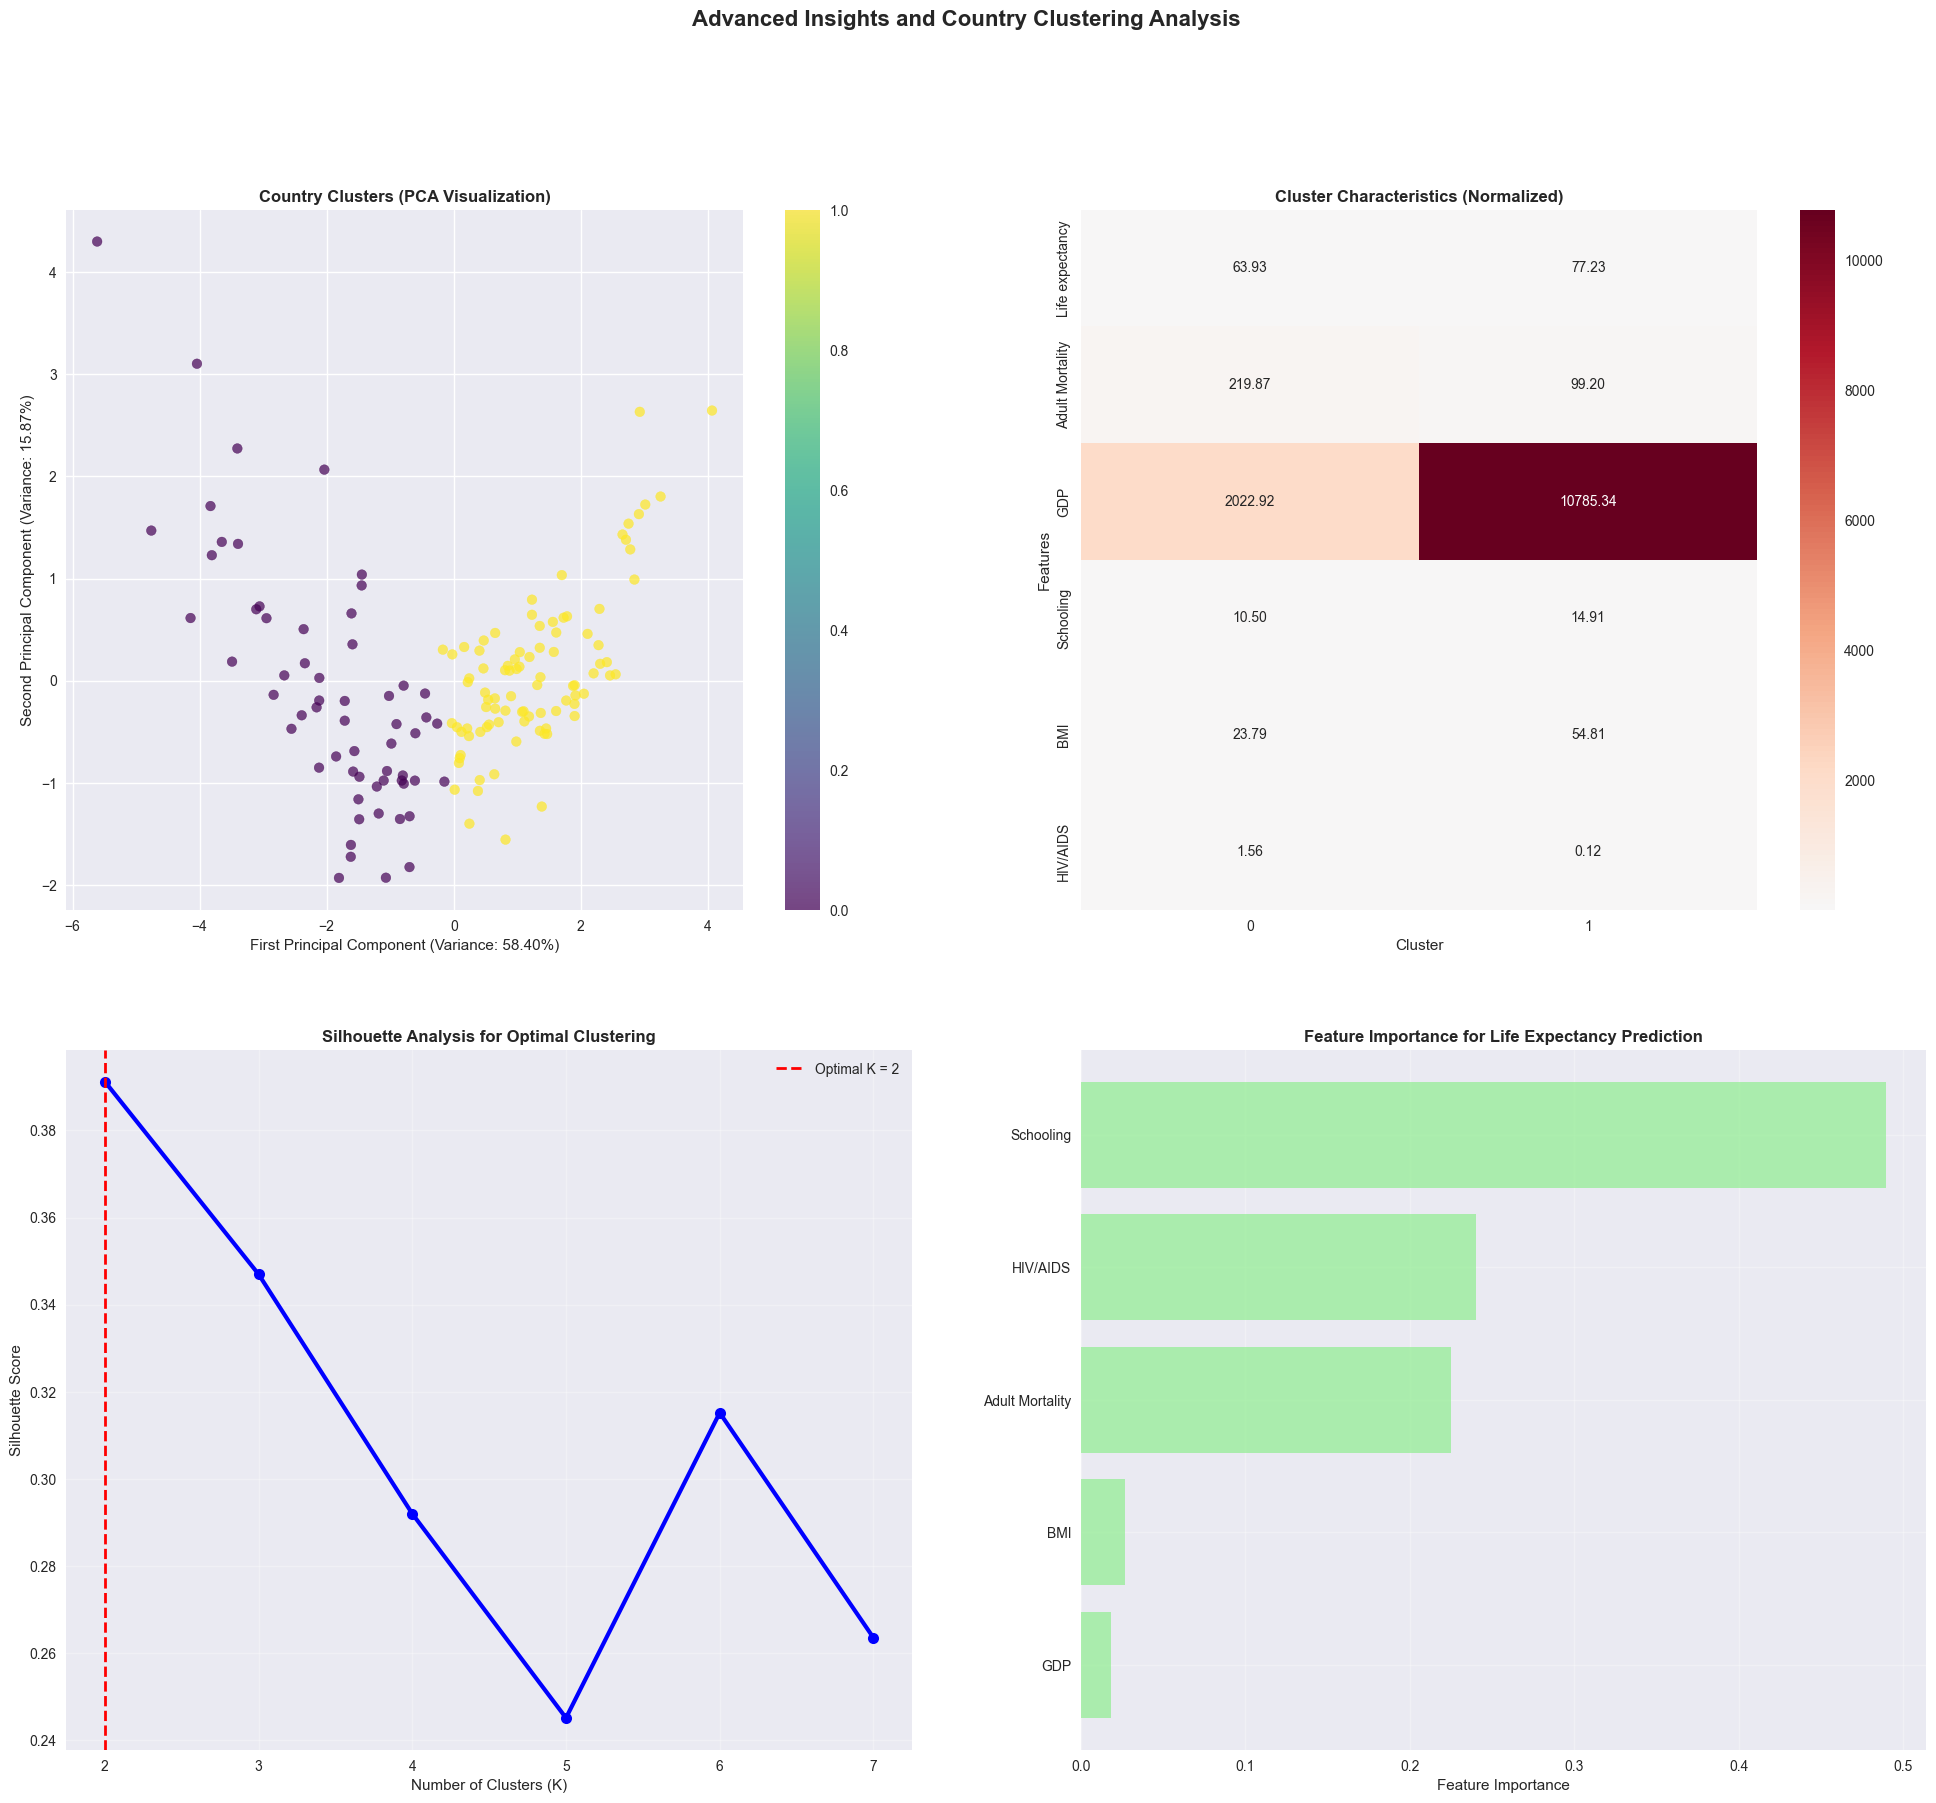

In [20]:
# Prepare data for clustering
latest_year = df['Year'].max()
cluster_data = df[df['Year'] == latest_year].copy()
    
# Select features for clustering
feature_cols = ['Life expectancy', 'Adult Mortality', 'GDP', 'Schooling', 'BMI', 'HIV/AIDS']
cluster_df = cluster_data[feature_cols].dropna()
    
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)
    
# Perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
    
# Find optimal number of clusters
k_range = range(2, 8)
silhouette_scores = []
    
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")
    
# Perform final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
    
# Add cluster labels to data
cluster_df['Cluster'] = cluster_labels
cluster_df['Country'] = cluster_data.loc[cluster_df.index, 'Country']
cluster_df['Status'] = cluster_data.loc[cluster_df.index, 'Status']
    
# Create advanced visualizations
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('Advanced Insights and Country Clustering Analysis', fontsize=16, fontweight='bold')
    
# 1. Cluster visualization (PCA)
from sklearn.decomposition import PCA
    
ax1 = axes[0, 0]
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
    
scatter = ax1.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
ax1.set_xlabel(f'First Principal Component (Variance: {pca.explained_variance_ratio_[0]:.2%})')
ax1.set_ylabel(f'Second Principal Component (Variance: {pca.explained_variance_ratio_[1]:.2%})')
ax1.set_title('Country Clusters (PCA Visualization)', fontweight='bold')
plt.colorbar(scatter, ax=ax1)
    
# 2. Cluster characteristics
ax2 = axes[0, 1]
cluster_means = cluster_df.groupby('Cluster')[feature_cols].mean()
    
# Heatmap of cluster characteristics
sns.heatmap(cluster_means.T, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax2)
ax2.set_title('Cluster Characteristics (Normalized)', fontweight='bold')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Features')
    
# 3. Silhouette analysis
ax3 = axes[1, 0]
ax3.plot(k_range, silhouette_scores, marker='o', linewidth=3, markersize=8, color='blue')
ax3.axvline(optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K = {optimal_k}')
ax3.set_xlabel('Number of Clusters (K)')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Silhouette Analysis for Optimal Clustering', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
    
# 4. Feature importance for life expectancy prediction
ax4 = axes[1, 1]
from sklearn.ensemble import RandomForestRegressor
    
# Prepare data for feature importance
X = cluster_df[feature_cols[1:]]  # Exclude life expectancy
y = cluster_df['Life expectancy']
    
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
    
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)
    
bars = ax4.barh(range(len(feature_importance)), feature_importance['Importance'], 
               color='lightgreen', alpha=0.7)
ax4.set_yticks(range(len(feature_importance)))
ax4.set_yticklabels(feature_importance['Feature'])
ax4.set_xlabel('Feature Importance')
ax4.set_title('Feature Importance for Life Expectancy Prediction', fontweight='bold')
ax4.grid(True, alpha=0.3)

In [21]:
# Print cluster insights
print(f"\nCLUSTER INSIGHTS:")
for cluster_id in range(optimal_k):
    cluster_countries = cluster_df[cluster_df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_countries)} countries):")
    print(f"  Average Life Expectancy: {cluster_countries['Life expectancy'].mean():.1f} years")
    print(f"  Development Status: {cluster_countries['Status'].value_counts().to_dict()}")
    print(f"  Example countries: {', '.join(cluster_countries['Country'].head(5).tolist())}")

print(f"\nFEATURE IMPORTANCE RANKING:")
for i, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")


CLUSTER INSIGHTS:

Cluster 0 (60 countries):
  Average Life Expectancy: 63.9 years
  Development Status: {'Developing': 60}
  Example countries: Afghanistan, Angola, Bangladesh, Belize, Benin

Cluster 1 (91 countries):
  Average Life Expectancy: 77.2 years
  Development Status: {'Developing': 63, 'Developed': 28}
  Example countries: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

FEATURE IMPORTANCE RANKING:
  GDP: 0.019
  BMI: 0.027
  Adult Mortality: 0.225
  HIV/AIDS: 0.240
  Schooling: 0.490
